# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import random
from tqdm.notebook import tqdm

plt.style.use('dark_background')

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# PRIMEIRA QUESTÃO

### Determinar tempo em 3 anos

In [3]:
todayB = dt.date.today()
yesterdayB = todayB - dt.timedelta(days=3*365)
print(todayB,yesterdayB)

2022-07-01 2019-07-02


### Escolha de 5 índices

In [4]:
df1 = pd.read_html('http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=UTIL&idioma=pt-br%27')
df2 = pd.read_html('http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IMOB&idioma=pt-br%27')
df3 = pd.read_html('http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IFNC&idioma=pt-br%27')
df4 = pd.read_html('http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IEE&idioma=pt-br%27')
df5 = pd.read_html('http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=ICON&idioma=pt-br%27')

### Concatenar dataframes

In [5]:
frames = [df1[0], df2[0], df3[0], df4[0], df5[0]]
resultado = pd.concat(frames)
resultado

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
0,ALUP11,ALUPAR,UNT N2,143.807.403,1858
1,CESP6,CESP,PNB N1,182.017.689,2687
2,CMIG3,CEMIG,ON N1,238.976.793,1859
3,CMIG4,CEMIG,PN N1,969.723.092,6231
4,CPFE3,CPFL ENERGIA,ON NM,187.714.249,2934
...,...,...,...,...,...
61,VIVA3,VIVARA S.A.,ON NM,93.368.726,366
62,VULC3,VULCABRAS,ON NM,74.685.291,88
63,VVAR3,VIAVAREJO,ON NM,1.595.083.594,3174
64,YDUQ3,YDUQS PART,ON NM,300.483.575,1418


In [6]:
resultado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 65
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Código         152 non-null    object
 1   Ação           147 non-null    object
 2   Tipo           147 non-null    object
 3   Qtde. Teórica  152 non-null    object
 4   Part. (%)      152 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 7.1+ KB


In [7]:
resultado['Código'].values

array(['ALUP11', 'CESP6', 'CMIG3', 'CMIG4', 'CPFE3', 'CPLE3', 'CPLE6',
       'CSMG3', 'EGIE3', 'ELET3', 'ELET6', 'ENBR3', 'ENEV3', 'ENGI11',
       'EQTL3', 'LIGT3', 'NEOE3', 'OMGE3', 'SAPR11', 'SAPR4', 'SBSP3',
       'TAEE11', 'TIET11', 'TRPL4', 'Quantidade Teórica Total  Redutor',
       'ALSO3', 'BRML3', 'BRPR3', 'CYRE3', 'DIRR3', 'EVEN3', 'EZTC3',
       'GFSA3', 'HBOR3', 'IGTA3', 'JHSF3', 'JPSA3', 'LOGG3', 'LPSB3',
       'MRVE3', 'MTRE3', 'MULT3', 'TCSA3', 'TEND3', 'TRIS3',
       'Quantidade Teórica Total  Redutor', 'ABCB4', 'B3SA3', 'BBAS3',
       'BBDC3', 'BBDC4', 'BBSE3', 'BIDI11', 'BIDI4', 'BMGB4', 'BPAC11',
       'BPAN4', 'BRSR6', 'CIEL3', 'IRBR3', 'ITSA4', 'ITUB3', 'ITUB4',
       'PSSA3', 'SANB11', 'SULA11', 'Quantidade Teórica Total  Redutor',
       'ALUP11', 'CESP6', 'CMIG4', 'COCE5', 'CPFE3', 'CPLE6', 'EGIE3',
       'ELET3', 'ENBR3', 'ENEV3', 'ENGI11', 'EQTL3', 'LIGT3', 'NEOE3',
       'OMGE3', 'TAEE11', 'TIET11', 'TRPL4',
       'Quantidade Teórica Total  Reduto

### Adicionar extensão .SA

In [8]:
def historicalDay(coin,yesterdayB,todayB):
    df = yf.download(coin, start=str(yesterdayB), end=str(todayB)) 
    df=df[df.columns[:6]]
    return df

resultado
symbols=list(resultado['Código'].values)
symbols=[sy+".SA" for sy in symbols[:-1]]

#symbols=[sy+".sa" for sy in symbols[:-1]]
np.array(symbols)

array(['ALUP11.SA', 'CESP6.SA', 'CMIG3.SA', 'CMIG4.SA', 'CPFE3.SA',
       'CPLE3.SA', 'CPLE6.SA', 'CSMG3.SA', 'EGIE3.SA', 'ELET3.SA',
       'ELET6.SA', 'ENBR3.SA', 'ENEV3.SA', 'ENGI11.SA', 'EQTL3.SA',
       'LIGT3.SA', 'NEOE3.SA', 'OMGE3.SA', 'SAPR11.SA', 'SAPR4.SA',
       'SBSP3.SA', 'TAEE11.SA', 'TIET11.SA', 'TRPL4.SA',
       'Quantidade Teórica Total  Redutor.SA', 'ALSO3.SA', 'BRML3.SA',
       'BRPR3.SA', 'CYRE3.SA', 'DIRR3.SA', 'EVEN3.SA', 'EZTC3.SA',
       'GFSA3.SA', 'HBOR3.SA', 'IGTA3.SA', 'JHSF3.SA', 'JPSA3.SA',
       'LOGG3.SA', 'LPSB3.SA', 'MRVE3.SA', 'MTRE3.SA', 'MULT3.SA',
       'TCSA3.SA', 'TEND3.SA', 'TRIS3.SA',
       'Quantidade Teórica Total  Redutor.SA', 'ABCB4.SA', 'B3SA3.SA',
       'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BIDI11.SA',
       'BIDI4.SA', 'BMGB4.SA', 'BPAC11.SA', 'BPAN4.SA', 'BRSR6.SA',
       'CIEL3.SA', 'IRBR3.SA', 'ITSA4.SA', 'ITUB3.SA', 'ITUB4.SA',
       'PSSA3.SA', 'SANB11.SA', 'SULA11.SA',
       'Quantidade Teórica Total  Redu

# Download dos ativos e extração do Volume

In [9]:
todayB = dt.date.today()
yesterdayB = todayB - dt.timedelta(days=3*365)
print(todayB,yesterdayB)

# outClose, outHigh, outLow = pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
outVolume = pd.DataFrame()
cols=[]

for symbol in tqdm(symbols):
    try: 
        df=historicalDay(symbol,yesterdayB,todayB)

        # dfOutClose = df['Close']
        # dfOutHigh  = df['High']
        # dfOutLow   = df['Low']
        dfOutVolume = df['Volume']


        # outClose = pd.concat([outClose,dfOutClose],axis=1)
        # outHigh = pd.concat([outHigh,dfOutHigh],axis=1)
        # outLow  = pd.concat([outLow, dfOutLow],axis=1)
        outVolume = pd.concat([outVolume, dfOutVolume],axis=1) 

        cols.append(symbol)
    except:
        print("Erro",symbol)

# outClose.columns=cols
# outHigh.columns=cols
# outLow.columns=cols
outVolume.columns=cols

2022-07-01 2019-07-02


  0%|          | 0/151 [00:00<?, ?it/s]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CESP6.SA: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BTOW3.SA: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CNTO3.SA: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%******

In [10]:
len(resultado)

152

In [11]:
output = outVolume.copy()

In [12]:
output

,ALUP11.SA,CESP6.SA,CMIG3.SA,CMIG4.SA,CPFE3.SA,CPLE3.SA,CPLE6.SA,CSMG3.SA,EGIE3.SA,ELET3.SA,...,SMLS3.SA,SMTO3.SA,SOMA3.SA,TCSA3.SA,TEND3.SA,TRIS3.SA,VIVA3.SA,VULC3.SA,VVAR3.SA,YDUQ3.SA
2019-07-02,673600.0,NaN,1319990.0,17728792.0,3060000.0,1694000.0,11568000.0,879300.0,1181800.0,2260358.0,...,NaN,937600.0,NaN,129830.0,436600.0,1059300.0,NaN,285600.0,NaN,3460300.0
2019-07-03,370800.0,NaN,640905.0,12459094.0,5230500.0,693000.0,4157000.0,754200.0,1842300.0,2158619.0,...,NaN,412300.0,NaN,561670.0,761100.0,1060300.0,NaN,488800.0,NaN,2537500.0
2019-07-04,550700.0,NaN,803131.0,8950187.0,2914200.0,1080000.0,4281000.0,1849500.0,991800.0,2445729.0,...,NaN,523300.0,NaN,314340.0,595500.0,577000.0,NaN,803100.0,NaN,1347300.0
2019-07-05,472900.0,NaN,1060881.0,12009690.0,1310800.0,2078000.0,10276000.0,1343100.0,744100.0,1620415.0,...,NaN,556600.0,NaN,136660.0,517000.0,892900.0,NaN,931800.0,NaN,2255700.0
2019-07-08,857700.0,NaN,533609.0,10482957.0,5741100.0,1318000.0,9927000.0,1365000.0,601600.0,1737359.0,...,NaN,884300.0,NaN,3560120.0,293100.0,1294700.0,NaN,2060800.0,NaN,4220300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-27,696100.0,NaN,4078200.0,11046800.0,1786300.0,568900.0,7804400.0,768500.0,1339200.0,15156800.0,...,NaN,1596100.0,4468600.0,331400.0,1310000.0,1010000.0,901700.0,265500.0,NaN,2413800.0
2022-06-28,451900.0,NaN,4546000.0,8633200.0,1951300.0,668800.0,7181300.0,995700.0,1069200.0,19683200.0,...,NaN,1661600.0,4325600.0,470000.0,2577300.0,869700.0,1358900.0,206700.0,NaN,1826800.0
2022-06-29,822600.0,NaN,347800.0,9490800.0,1694200.0,599400.0,8875700.0,700000.0,1503900.0,12241800.0,...,NaN,1064700.0,3900100.0,474600.0,2082500.0,761400.0,871700.0,186300.0,NaN,2028800.0
2022-06-30,1203500.0,NaN,1105300.0,11738600.0,1942500.0,1201800.0,10874600.0,1216700.0,2086700.0,21345700.0,...,NaN,7600000.0,9675500.0,630400.0,2666200.0,1170900.0,505800.0,483100.0,NaN,2506200.0


## Limpeza de dados e Remoção dos NaN

### Removendo ativos duplicados

In [13]:
output = output.drop_duplicates(keep='first')
output

,ALUP11.SA,CESP6.SA,CMIG3.SA,CMIG4.SA,CPFE3.SA,CPLE3.SA,CPLE6.SA,CSMG3.SA,EGIE3.SA,ELET3.SA,...,SMLS3.SA,SMTO3.SA,SOMA3.SA,TCSA3.SA,TEND3.SA,TRIS3.SA,VIVA3.SA,VULC3.SA,VVAR3.SA,YDUQ3.SA
2019-07-02,673600.0,NaN,1319990.0,17728792.0,3060000.0,1694000.0,11568000.0,879300.0,1181800.0,2260358.0,...,NaN,937600.0,NaN,129830.0,436600.0,1059300.0,NaN,285600.0,NaN,3460300.0
2019-07-03,370800.0,NaN,640905.0,12459094.0,5230500.0,693000.0,4157000.0,754200.0,1842300.0,2158619.0,...,NaN,412300.0,NaN,561670.0,761100.0,1060300.0,NaN,488800.0,NaN,2537500.0
2019-07-04,550700.0,NaN,803131.0,8950187.0,2914200.0,1080000.0,4281000.0,1849500.0,991800.0,2445729.0,...,NaN,523300.0,NaN,314340.0,595500.0,577000.0,NaN,803100.0,NaN,1347300.0
2019-07-05,472900.0,NaN,1060881.0,12009690.0,1310800.0,2078000.0,10276000.0,1343100.0,744100.0,1620415.0,...,NaN,556600.0,NaN,136660.0,517000.0,892900.0,NaN,931800.0,NaN,2255700.0
2019-07-08,857700.0,NaN,533609.0,10482957.0,5741100.0,1318000.0,9927000.0,1365000.0,601600.0,1737359.0,...,NaN,884300.0,NaN,3560120.0,293100.0,1294700.0,NaN,2060800.0,NaN,4220300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,383900.0,NaN,520300.0,6336500.0,2372900.0,776300.0,7497300.0,738300.0,1392400.0,15344000.0,...,NaN,1367900.0,8209500.0,333300.0,1548500.0,1110800.0,1555200.0,221000.0,NaN,3198600.0
2022-06-27,696100.0,NaN,4078200.0,11046800.0,1786300.0,568900.0,7804400.0,768500.0,1339200.0,15156800.0,...,NaN,1596100.0,4468600.0,331400.0,1310000.0,1010000.0,901700.0,265500.0,NaN,2413800.0
2022-06-28,451900.0,NaN,4546000.0,8633200.0,1951300.0,668800.0,7181300.0,995700.0,1069200.0,19683200.0,...,NaN,1661600.0,4325600.0,470000.0,2577300.0,869700.0,1358900.0,206700.0,NaN,1826800.0
2022-06-29,822600.0,NaN,347800.0,9490800.0,1694200.0,599400.0,8875700.0,700000.0,1503900.0,12241800.0,...,NaN,1064700.0,3900100.0,474600.0,2082500.0,761400.0,871700.0,186300.0,NaN,2028800.0


### Gráfico dos dados NaN presentes em cada ativo

In [14]:
output.isnull().head()

,ALUP11.SA,CESP6.SA,CMIG3.SA,CMIG4.SA,CPFE3.SA,CPLE3.SA,CPLE6.SA,CSMG3.SA,EGIE3.SA,ELET3.SA,...,SMLS3.SA,SMTO3.SA,SOMA3.SA,TCSA3.SA,TEND3.SA,TRIS3.SA,VIVA3.SA,VULC3.SA,VVAR3.SA,YDUQ3.SA
2019-07-02,False,True,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,True,False,True,False
2019-07-03,False,True,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,True,False,True,False
2019-07-04,False,True,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,True,False,True,False
2019-07-05,False,True,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,True,False,True,False
2019-07-08,False,True,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,True,False,True,False


In [15]:
output.isnull().sum()

ALUP11.SA      1
CESP6.SA     745
CMIG3.SA       1
CMIG4.SA       1
CPFE3.SA       1
            ... 
TRIS3.SA       1
VIVA3.SA      73
VULC3.SA       1
VVAR3.SA     745
YDUQ3.SA       1
Length: 147, dtype: int64

In [16]:
output.isnull().sum().values

array([  1, 745,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1, 745,   1,   1,   1,   1, 745,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1, 745,   1, 745,   1,   1,   1,
       154,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,  84,  69,
       106,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
       745,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
       745,   1, 745,   1,   1,   1,   1,   1,   1,   1, 411,   1,   1,
         1, 745,   1,  90, 745,   1,   1,   1,   1,   1,   1,   1,   1,
         1, 745,   1,   1,   1,   1, 745,   1,   1,   1, 745, 745,   1,
         1, 277,   1,   1,   1,   1,   1,   1,   1, 154,   1, 119,   1,
         1,   1,   1,   1,   1,   1,   1, 745,   1, 271,   1,   1,   1,
        73,   1, 745,   1], dtype=int64)

In [17]:
len(output)

745

### Gráfico de Calor

<AxesSubplot:>

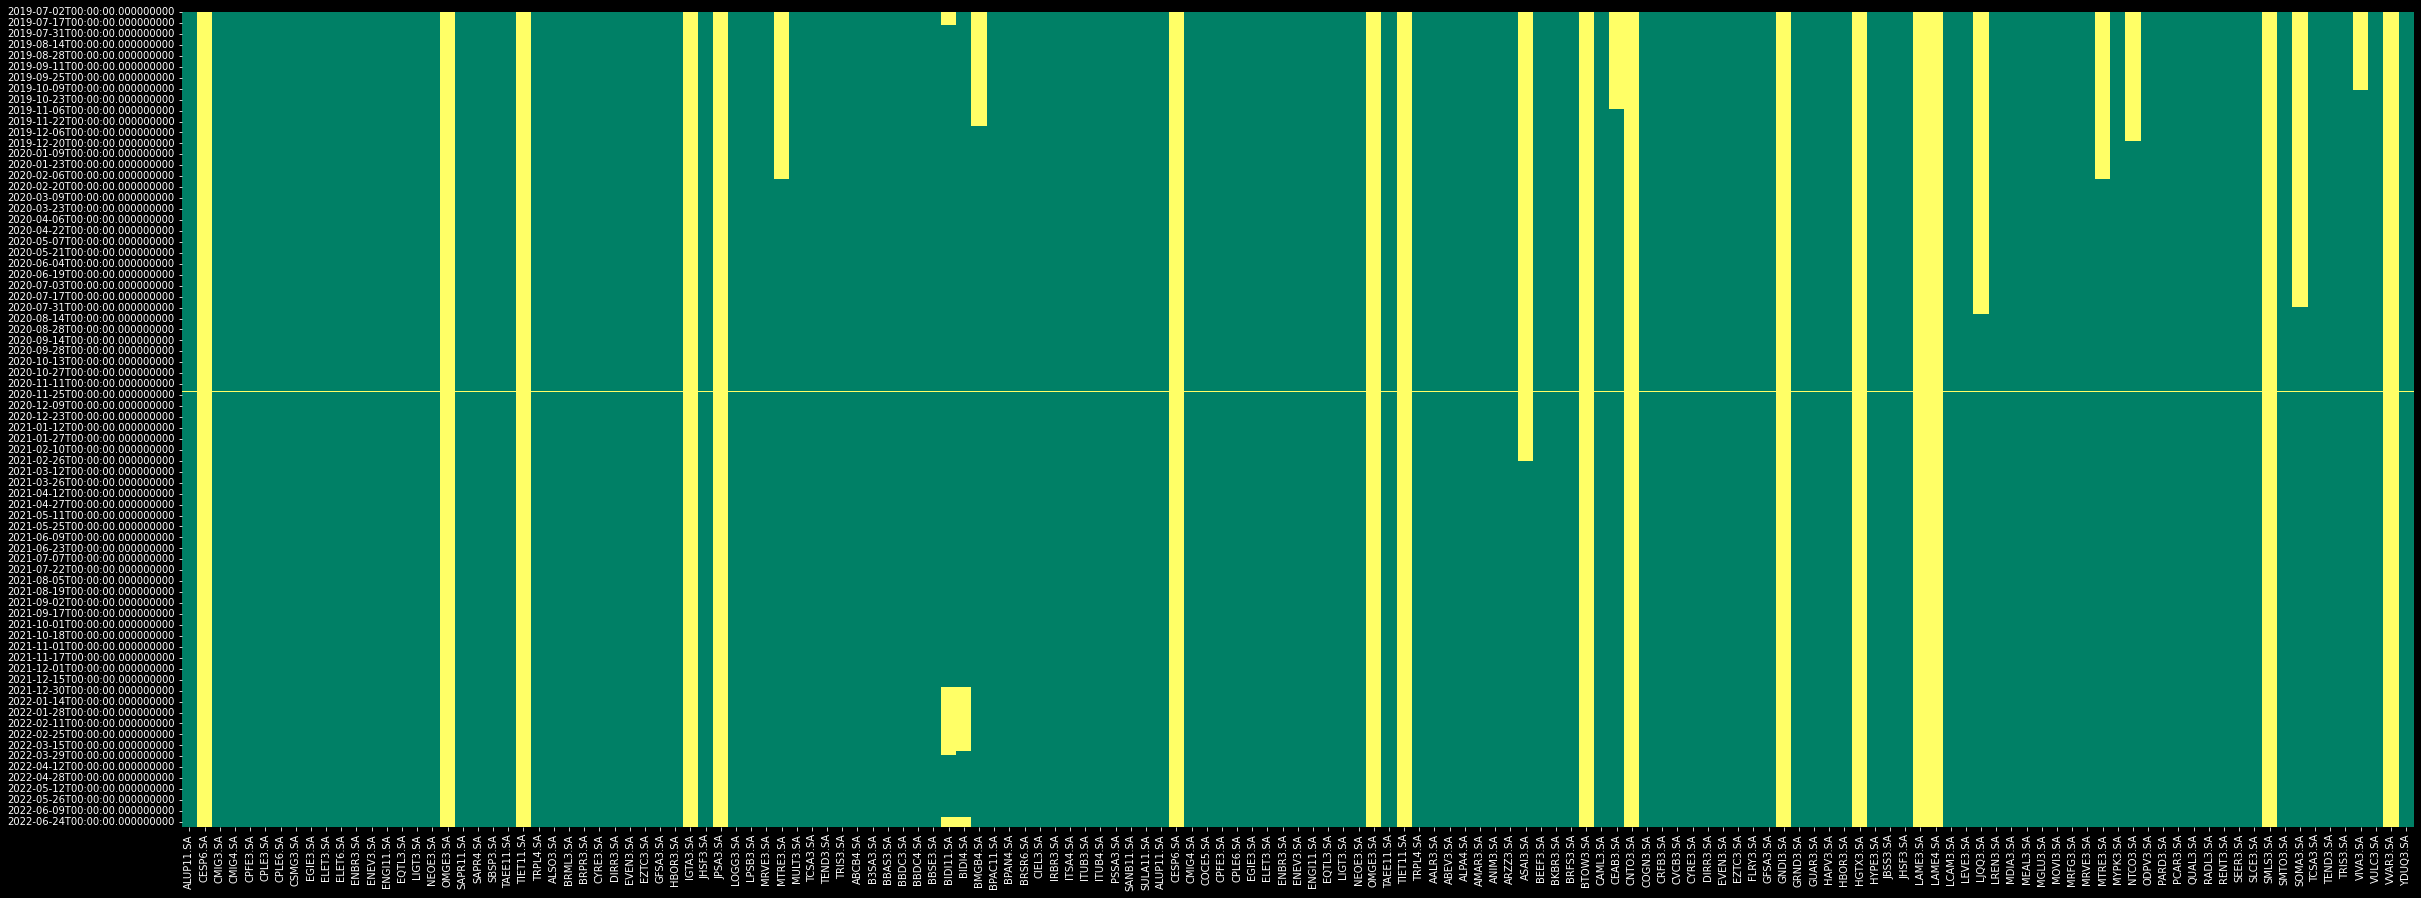

In [18]:
plt.figure(figsize=(40, 15))
sns.heatmap(output.isnull(), cbar=False, cmap="summer")

### Removendo as colunas com erro NaN

<AxesSubplot:>

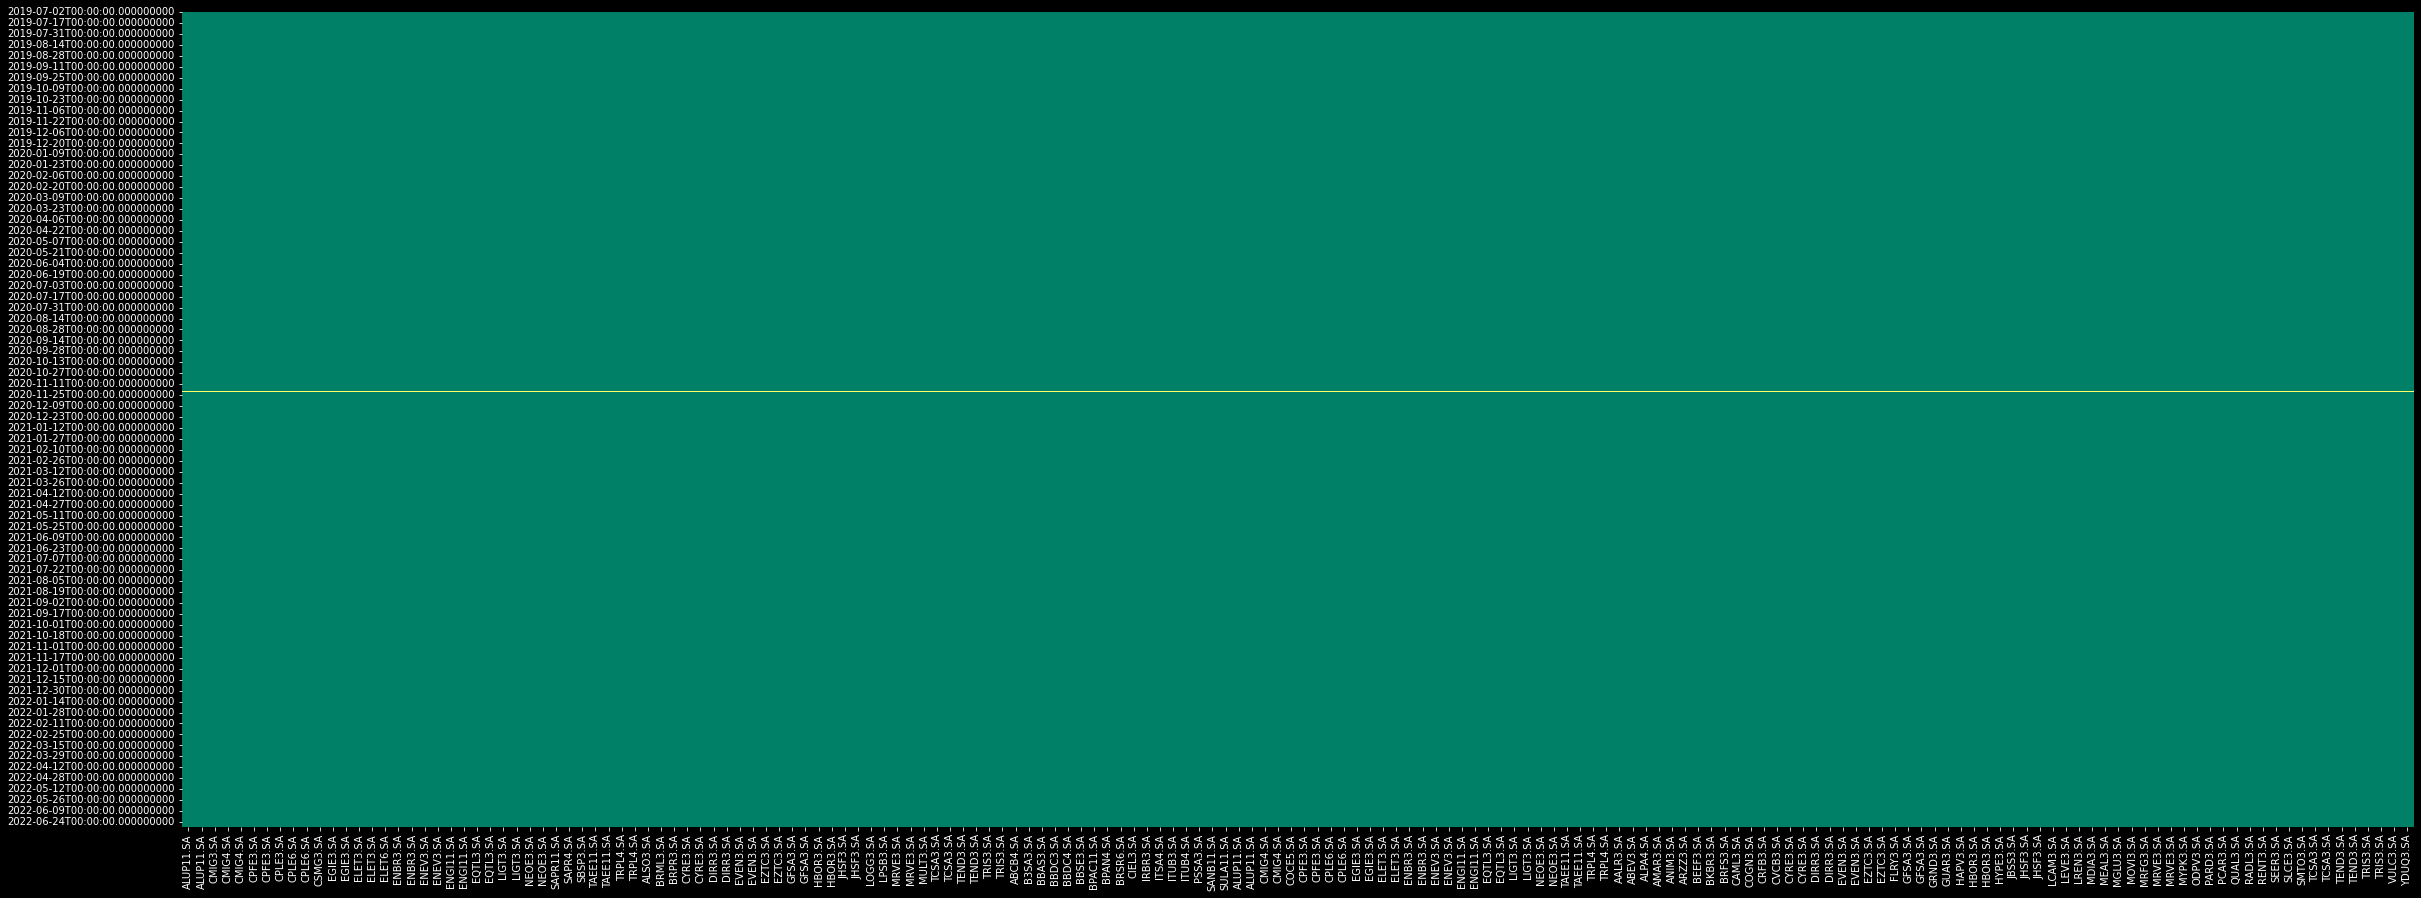

In [19]:
plt.figure(figsize=(40, 15))
out = output[output.columns[np.where(output.isnull().sum().values==1)[0]]]

sns.heatmap(out.isnull(), cbar=False, cmap='summer')

In [20]:
out.isnull().sum()

ALUP11.SA    1
ALUP11.SA    1
CMIG3.SA     1
CMIG4.SA     1
CMIG4.SA     1
            ..
TEND3.SA     1
TRIS3.SA     1
TRIS3.SA     1
VULC3.SA     1
YDUQ3.SA     1
Length: 170, dtype: int64

### Removendo as linhas com erro utilizando o comando drop

<AxesSubplot:>

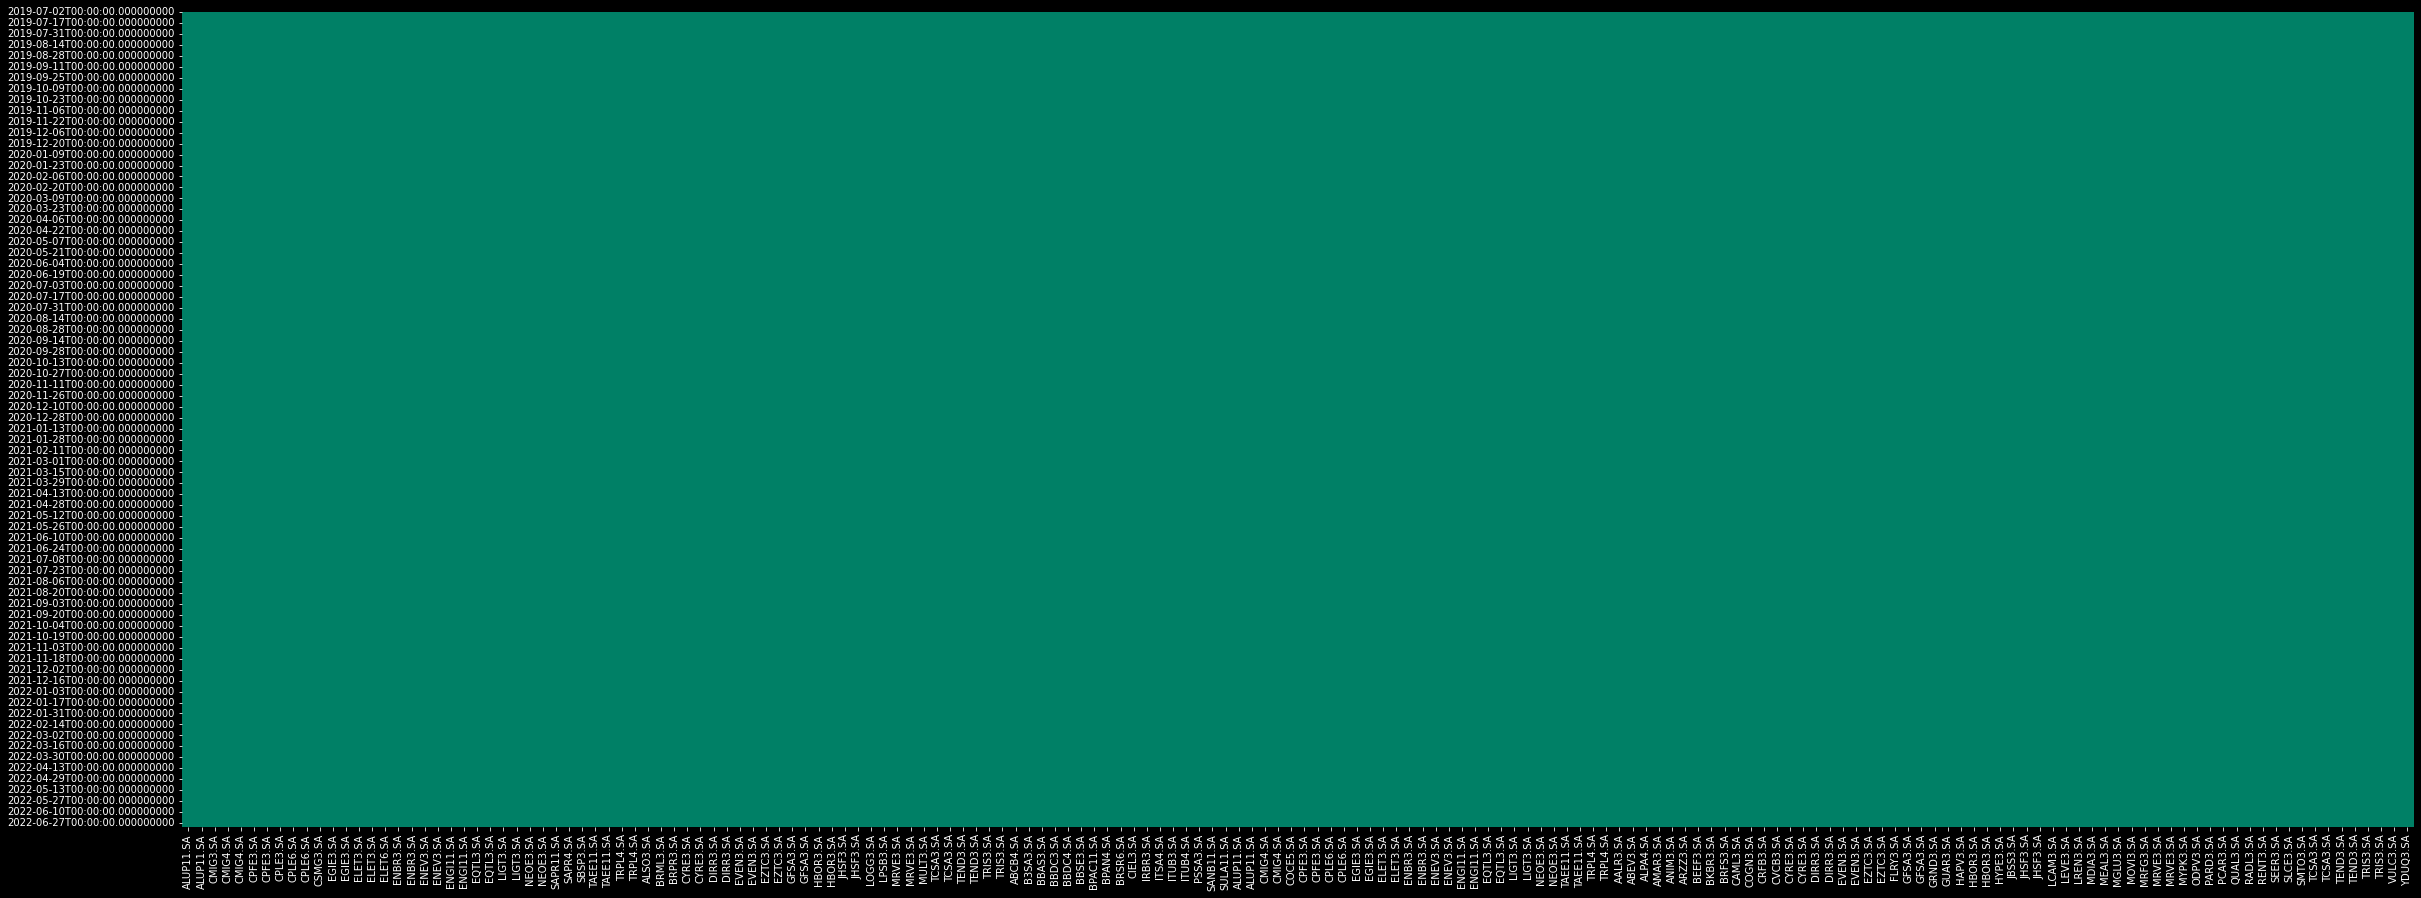

In [21]:
plt.figure(figsize=(40, 15))
sns.heatmap(out.dropna().isnull(), cbar=False, cmap='summer')

<AxesSubplot:title={'center':'Gráfico que representa a liquidez do ativo'}, ylabel='Volume'>

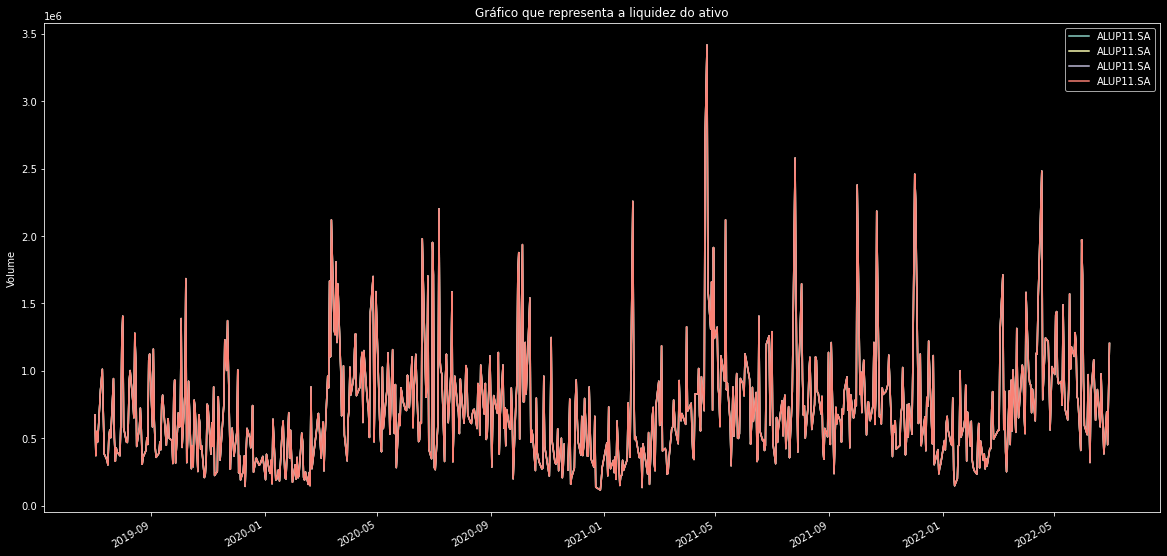

In [22]:
out['ALUP11.SA'].plot(figsize=(20, 10), title='Gráfico que representa a liquidez do ativo', ylabel='Volume')

In [23]:
out['ALUP11.SA'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 2019-07-02 to 2022-06-30
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ALUP11.SA  744 non-null    float64
 1   ALUP11.SA  744 non-null    float64
 2   ALUP11.SA  744 non-null    float64
 3   ALUP11.SA  744 non-null    float64
dtypes: float64(4)
memory usage: 29.1 KB


### Removendo ativos duplicados

In [24]:
out.isnull().sum()

ALUP11.SA    1
ALUP11.SA    1
CMIG3.SA     1
CMIG4.SA     1
CMIG4.SA     1
            ..
TEND3.SA     1
TRIS3.SA     1
TRIS3.SA     1
VULC3.SA     1
YDUQ3.SA     1
Length: 170, dtype: int64

In [25]:
out = out.T.drop_duplicates(keep='first')
out = out.T
out

,ALUP11.SA,CMIG3.SA,CMIG4.SA,CPFE3.SA,CPLE3.SA,CPLE6.SA,CSMG3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,...,PARD3.SA,PCAR3.SA,QUAL3.SA,RADL3.SA,RENT3.SA,SEER3.SA,SLCE3.SA,SMTO3.SA,VULC3.SA,YDUQ3.SA
2019-07-02,673600.0,1319990.0,17728792.0,3060000.0,1694000.0,11568000.0,879300.0,1181800.0,2260358.0,1492100.0,...,659100.0,0.0,2625500.0,5852000.0,3266760.0,921000.0,2368080.0,937600.0,285600.0,3460300.0
2019-07-03,370800.0,640905.0,12459094.0,5230500.0,693000.0,4157000.0,754200.0,1842300.0,2158619.0,1272200.0,...,266100.0,0.0,916600.0,6192000.0,3842790.0,716600.0,903430.0,412300.0,488800.0,2537500.0
2019-07-04,550700.0,803131.0,8950187.0,2914200.0,1080000.0,4281000.0,1849500.0,991800.0,2445729.0,1924500.0,...,79600.0,0.0,958900.0,4944500.0,3095400.0,401800.0,1433080.0,523300.0,803100.0,1347300.0
2019-07-05,472900.0,1060881.0,12009690.0,1310800.0,2078000.0,10276000.0,1343100.0,744100.0,1620415.0,1333000.0,...,709400.0,0.0,1771600.0,3226000.0,3603810.0,435100.0,980100.0,556600.0,931800.0,2255700.0
2019-07-08,857700.0,533609.0,10482957.0,5741100.0,1318000.0,9927000.0,1365000.0,601600.0,1737359.0,860100.0,...,2761900.0,0.0,1338600.0,6263500.0,4162305.0,400900.0,1017390.0,884300.0,2060800.0,4220300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,383900.0,520300.0,6336500.0,2372900.0,776300.0,7497300.0,738300.0,1392400.0,15344000.0,3125500.0,...,104200.0,1332200.0,2460800.0,3618200.0,8926200.0,332900.0,2856100.0,1367900.0,221000.0,3198600.0
2022-06-27,696100.0,4078200.0,11046800.0,1786300.0,568900.0,7804400.0,768500.0,1339200.0,15156800.0,4121100.0,...,101500.0,1405800.0,1941000.0,3547000.0,12200600.0,436300.0,1481700.0,1596100.0,265500.0,2413800.0
2022-06-28,451900.0,4546000.0,8633200.0,1951300.0,668800.0,7181300.0,995700.0,1069200.0,19683200.0,4003900.0,...,102400.0,3173400.0,2502900.0,6151800.0,7147200.0,268300.0,1531200.0,1661600.0,206700.0,1826800.0
2022-06-29,822600.0,347800.0,9490800.0,1694200.0,599400.0,8875700.0,700000.0,1503900.0,12241800.0,3063000.0,...,114100.0,1385000.0,3933600.0,3929200.0,18855000.0,345800.0,1558700.0,1064700.0,186300.0,2028800.0


In [26]:
out.isnull().sum()

ALUP11.SA    1
CMIG3.SA     1
CMIG4.SA     1
CPFE3.SA     1
CPLE3.SA     1
            ..
SEER3.SA     1
SLCE3.SA     1
SMTO3.SA     1
VULC3.SA     1
YDUQ3.SA     1
Length: 95, dtype: int64

In [27]:
len(out)

745

<AxesSubplot:title={'center':'Gráfico que representa a liquidez do ativo [ALUP11.SA]'}, ylabel='Volume'>

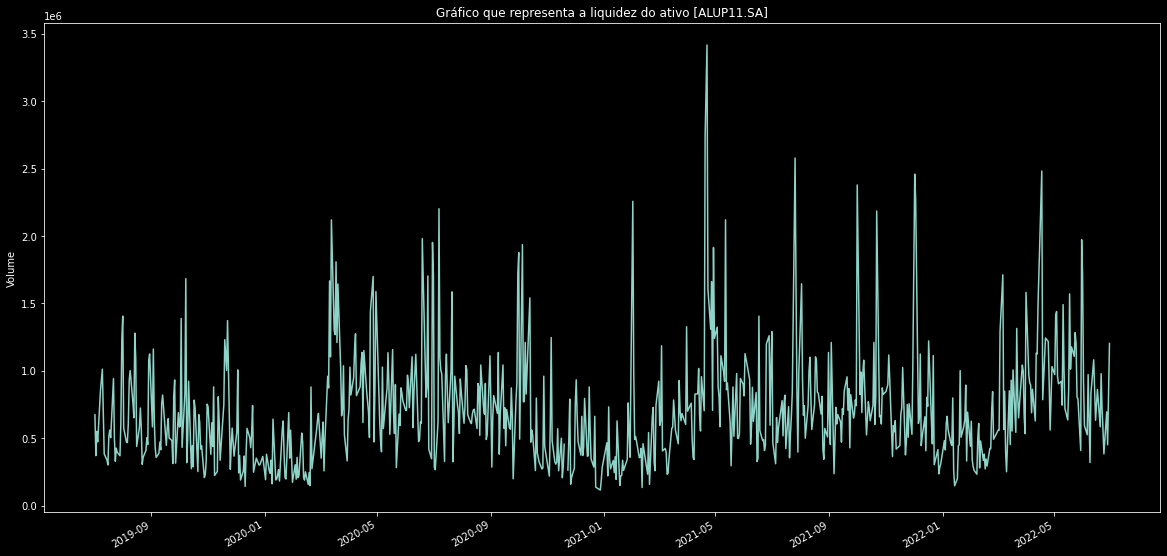

In [28]:
out['ALUP11.SA'].plot(figsize=(20, 10), title='Gráfico que representa a liquidez do ativo [ALUP11.SA]', ylabel='Volume')

In [29]:
out

,ALUP11.SA,CMIG3.SA,CMIG4.SA,CPFE3.SA,CPLE3.SA,CPLE6.SA,CSMG3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,...,PARD3.SA,PCAR3.SA,QUAL3.SA,RADL3.SA,RENT3.SA,SEER3.SA,SLCE3.SA,SMTO3.SA,VULC3.SA,YDUQ3.SA
2019-07-02,673600.0,1319990.0,17728792.0,3060000.0,1694000.0,11568000.0,879300.0,1181800.0,2260358.0,1492100.0,...,659100.0,0.0,2625500.0,5852000.0,3266760.0,921000.0,2368080.0,937600.0,285600.0,3460300.0
2019-07-03,370800.0,640905.0,12459094.0,5230500.0,693000.0,4157000.0,754200.0,1842300.0,2158619.0,1272200.0,...,266100.0,0.0,916600.0,6192000.0,3842790.0,716600.0,903430.0,412300.0,488800.0,2537500.0
2019-07-04,550700.0,803131.0,8950187.0,2914200.0,1080000.0,4281000.0,1849500.0,991800.0,2445729.0,1924500.0,...,79600.0,0.0,958900.0,4944500.0,3095400.0,401800.0,1433080.0,523300.0,803100.0,1347300.0
2019-07-05,472900.0,1060881.0,12009690.0,1310800.0,2078000.0,10276000.0,1343100.0,744100.0,1620415.0,1333000.0,...,709400.0,0.0,1771600.0,3226000.0,3603810.0,435100.0,980100.0,556600.0,931800.0,2255700.0
2019-07-08,857700.0,533609.0,10482957.0,5741100.0,1318000.0,9927000.0,1365000.0,601600.0,1737359.0,860100.0,...,2761900.0,0.0,1338600.0,6263500.0,4162305.0,400900.0,1017390.0,884300.0,2060800.0,4220300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,383900.0,520300.0,6336500.0,2372900.0,776300.0,7497300.0,738300.0,1392400.0,15344000.0,3125500.0,...,104200.0,1332200.0,2460800.0,3618200.0,8926200.0,332900.0,2856100.0,1367900.0,221000.0,3198600.0
2022-06-27,696100.0,4078200.0,11046800.0,1786300.0,568900.0,7804400.0,768500.0,1339200.0,15156800.0,4121100.0,...,101500.0,1405800.0,1941000.0,3547000.0,12200600.0,436300.0,1481700.0,1596100.0,265500.0,2413800.0
2022-06-28,451900.0,4546000.0,8633200.0,1951300.0,668800.0,7181300.0,995700.0,1069200.0,19683200.0,4003900.0,...,102400.0,3173400.0,2502900.0,6151800.0,7147200.0,268300.0,1531200.0,1661600.0,206700.0,1826800.0
2022-06-29,822600.0,347800.0,9490800.0,1694200.0,599400.0,8875700.0,700000.0,1503900.0,12241800.0,3063000.0,...,114100.0,1385000.0,3933600.0,3929200.0,18855000.0,345800.0,1558700.0,1064700.0,186300.0,2028800.0


## Seleção dos 50 indices que possuem maior liquidez

In [30]:
volumeTotal = out.sum()

In [31]:
volumeTotal.sort_values(ascending=False)

MGLU3.SA    4.621648e+10
BBDC4.SA    3.372971e+10
COGN3.SA    3.096290e+10
B3SA3.SA    2.977821e+10
ITUB4.SA    2.601646e+10
                ...     
AALR3.SA    5.121262e+08
PARD3.SA    3.317242e+08
LOGG3.SA    3.266936e+08
LEVE3.SA    3.248055e+08
COCE5.SA    2.116490e+07
Length: 95, dtype: float64

In [32]:
volumeTotal.sort_values(ascending=False).head(50)

MGLU3.SA     4.621648e+10
BBDC4.SA     3.372971e+10
COGN3.SA     3.096290e+10
B3SA3.SA     2.977821e+10
ITUB4.SA     2.601646e+10
CIEL3.SA     2.382165e+10
ITSA4.SA     2.173044e+10
IRBR3.SA     1.978823e+10
ABEV3.SA     1.922795e+10
HAPV3.SA     1.346041e+10
BBAS3.SA     1.182990e+10
BRML3.SA     1.140600e+10
JBSS3.SA     1.047581e+10
CMIG4.SA     1.037852e+10
CPLE6.SA     9.133707e+09
BPAC11.SA    8.884514e+09
MRFG3.SA     7.241236e+09
LREN3.SA     6.752865e+09
BRFS3.SA     6.729043e+09
EQTL3.SA     5.788734e+09
BEEF3.SA     5.621667e+09
CVCB3.SA     5.343015e+09
BBDC3.SA     5.273702e+09
RADL3.SA     5.084718e+09
ENEV3.SA     5.063351e+09
CYRE3.SA     5.024954e+09
RENT3.SA     4.836931e+09
ELET3.SA     4.791069e+09
JHSF3.SA     4.736469e+09
GFSA3.SA     4.630541e+09
MULT3.SA     4.425629e+09
PCAR3.SA     4.338219e+09
MEAL3.SA     4.167442e+09
MRVE3.SA     4.039819e+09
BPAN4.SA     3.954534e+09
AMAR3.SA     3.952114e+09
BBSE3.SA     3.765328e+09
CRFB3.SA     3.467246e+09
QUAL3.SA    

In [33]:
ativosMaisLiquidos = volumeTotal.sort_values(ascending=False).head(50)

In [34]:
ativosMaisLiquidos.index

Index(['MGLU3.SA', 'BBDC4.SA', 'COGN3.SA', 'B3SA3.SA', 'ITUB4.SA', 'CIEL3.SA',
       'ITSA4.SA', 'IRBR3.SA', 'ABEV3.SA', 'HAPV3.SA', 'BBAS3.SA', 'BRML3.SA',
       'JBSS3.SA', 'CMIG4.SA', 'CPLE6.SA', 'BPAC11.SA', 'MRFG3.SA', 'LREN3.SA',
       'BRFS3.SA', 'EQTL3.SA', 'BEEF3.SA', 'CVCB3.SA', 'BBDC3.SA', 'RADL3.SA',
       'ENEV3.SA', 'CYRE3.SA', 'RENT3.SA', 'ELET3.SA', 'JHSF3.SA', 'GFSA3.SA',
       'MULT3.SA', 'PCAR3.SA', 'MEAL3.SA', 'MRVE3.SA', 'BPAN4.SA', 'AMAR3.SA',
       'BBSE3.SA', 'CRFB3.SA', 'QUAL3.SA', 'SBSP3.SA', 'SAPR4.SA', 'HYPE3.SA',
       'SULA11.SA', 'YDUQ3.SA', 'LCAM3.SA', 'ENBR3.SA', 'ELET6.SA', 'LIGT3.SA',
       'CPFE3.SA', 'MOVI3.SA'],
      dtype='object')

# SEGUNDA QUESTÃO

## Amostra de Treinamento [Primeiros Dois Anos]

### Download dos Ativos

In [35]:
todayB = dt.date.today() - dt.timedelta(days=1*365)
yesterdayB = todayB - dt.timedelta(days=2*365)
print(todayB,yesterdayB)

2021-07-01 2019-07-02


In [36]:
def historicalDay(coin,yesterdayB,todayB):
    df = yf.download(coin, start=str(yesterdayB), end=str(todayB)) 
    df=df[df.columns[:6]]
    return df

In [37]:
outCloseTrei, outHighTrei, outLowTrei, outVolumeTrei = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(), pd.DataFrame()
cols=[]

for symbol in tqdm(ativosMaisLiquidos.index):
    try: 
        df=historicalDay(symbol,yesterdayB,todayB)

        dfOutCloseTrei = df['Close']
        dfOutHighTrei  = df['High']
        dfOutLowTrei   = df['Low']
        dfOutVolumeTrei = df['Volume']


        outCloseTrei = pd.concat([outCloseTrei,dfOutCloseTrei],axis=1)
        outHighTrei = pd.concat([outHighTrei,dfOutHighTrei],axis=1)
        outLowTrei  = pd.concat([outLowTrei, dfOutLowTrei],axis=1)
        outVolumeTrei = pd.concat([outVolumeTrei, dfOutVolumeTrei],axis=1) 

        cols.append(symbol)
    except:
        print("Erro",symbol)

outCloseTrei.columns=cols
outHighTrei.columns=cols
outLowTrei.columns=cols
outVolumeTrei.columns=cols

  0%|          | 0/50 [00:00<?, ?it/s]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [38]:
output = outCloseTrei.copy()

In [39]:
output.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 2019-07-02 00:00:00 to 2021-07-01 00:00:00
Data columns (total 50 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MGLU3.SA   495 non-null    float64
 1   BBDC4.SA   495 non-null    float64
 2   COGN3.SA   495 non-null    float64
 3   B3SA3.SA   495 non-null    float64
 4   ITUB4.SA   495 non-null    float64
 5   CIEL3.SA   495 non-null    float64
 6   ITSA4.SA   495 non-null    float64
 7   IRBR3.SA   495 non-null    float64
 8   ABEV3.SA   495 non-null    float64
 9   HAPV3.SA   495 non-null    float64
 10  BBAS3.SA   495 non-null    float64
 11  BRML3.SA   495 non-null    float64
 12  JBSS3.SA   495 non-null    float64
 13  CMIG4.SA   495 non-null    float64
 14  CPLE6.SA   495 non-null    float64
 15  BPAC11.SA  495 non-null    float64
 16  MRFG3.SA   495 non-null    float64
 17  LREN3.SA   495 non-null    float64
 18  BRFS3.SA   495 non-null    float64
 19  EQTL3.SA   495 non-nu

## Amostra de Teste [Ultimo Ano]

### Download dos Ativos

In [40]:
todayB = dt.date.today()
yesterdayB = todayB - dt.timedelta(days=1*365)
print(todayB,yesterdayB)

2022-07-01 2021-07-01


In [41]:
def historicalDay(coin,yesterdayB,todayB):
    df = yf.download(coin, start=str(yesterdayB), end=str(todayB)) 
    df=df[df.columns[:6]]
    return df

In [42]:
outCloseTest, outHighTest, outLowTest, outVolumeTest = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(), pd.DataFrame()
cols=[]

for symbol in tqdm(ativosMaisLiquidos.index):
    try: 
        df=historicalDay(symbol,yesterdayB,todayB)

        dfOutCloseTest = df['Close']
        dfOutHighTest  = df['High']
        dfOutLowTest   = df['Low']
        dfOutVolumeTest = df['Volume']


        outCloseTest = pd.concat([outCloseTest, dfOutCloseTest],axis=1)
        outHighTest = pd.concat([outHighTest, dfOutHighTest],axis=1)
        outLowTest  = pd.concat([outLowTest, dfOutLowTest],axis=1)
        outVolumeTest = pd.concat([outVolumeTest, dfOutVolumeTest],axis=1) 

        cols.append(symbol)
    except:
        print("Erro",symbol)

outCloseTest.columns=cols
outHighTest.columns=cols
outLowTest.columns=cols
outVolumeTest.columns=cols

  0%|          | 0/50 [00:00<?, ?it/s]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [43]:
output = outCloseTest.copy()

In [44]:
output.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2021-07-01 00:00:00 to 2022-07-01 00:00:00
Data columns (total 50 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MGLU3.SA   249 non-null    float64
 1   BBDC4.SA   249 non-null    float64
 2   COGN3.SA   249 non-null    float64
 3   B3SA3.SA   249 non-null    float64
 4   ITUB4.SA   249 non-null    float64
 5   CIEL3.SA   249 non-null    float64
 6   ITSA4.SA   249 non-null    float64
 7   IRBR3.SA   249 non-null    float64
 8   ABEV3.SA   249 non-null    float64
 9   HAPV3.SA   249 non-null    float64
 10  BBAS3.SA   249 non-null    float64
 11  BRML3.SA   249 non-null    float64
 12  JBSS3.SA   249 non-null    float64
 13  CMIG4.SA   249 non-null    float64
 14  CPLE6.SA   249 non-null    float64
 15  BPAC11.SA  249 non-null    float64
 16  MRFG3.SA   249 non-null    float64
 17  LREN3.SA   249 non-null    float64
 18  BRFS3.SA   249 non-null    float64
 19  EQTL3.SA   249 non-nu

# TERCEIRA QUESTÃO

In [45]:
from sklearn.cluster import KMeans

Ativos com Melhor Indece Sharp em Cada Cluster: ['ELET6.SA', 'BPAN4.SA', 'BPAC11.SA', 'PCAR3.SA', 'HYPE3.SA']


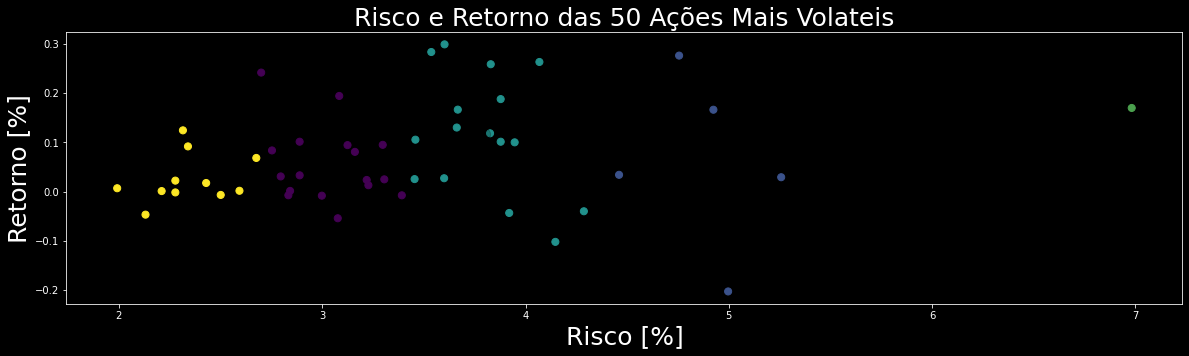

In [81]:
retornos=100*outCloseTrei.pct_change()
stocks=retornos.columns

X = np.array([[np.std(retornos[st]),np.mean(retornos[st])] for st in stocks])

#Numero de clusters
N = 5

kmeans = KMeans(n_clusters=N, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,1, 1) 
ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
ax1.set_title('Risco e Retorno das '+str(len(stocks))+' Ações Mais Volateis',fontsize=25)
ax1.set_xlabel('Risco [%]',fontsize=25)
ax1.set_ylabel('Retorno [%]',fontsize=25)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.2);

best=[]
#selic acumula de fev 2019 até fev 2021
selic = 8.44
for i in range(N):
    ind=retornos[retornos.columns[np.where(y_kmeans==i)[0]]].mean()-selic /retornos[retornos.columns[np.where(y_kmeans==i)[0]]].std()
    best.append(ind[ind==np.max(ind)])
rb=list(pd.DataFrame(best).columns)
print("Ativos com Melhor Indece Sharp em Cada Cluster:", rb)

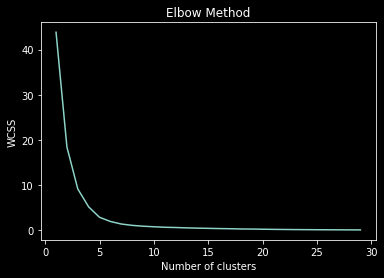

In [82]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Retorno dos Ativos Escolhidos

In [83]:
retornos[rb]

,ELET6.SA,BPAN4.SA,BPAC11.SA,PCAR3.SA,HYPE3.SA
2019-07-02,NaN,NaN,NaN,NaN,NaN
2019-07-03,1.551479,-4.806779,1.816730,0.000000,-0.546075
2019-07-04,3.944439,1.485145,3.450977,0.000000,1.338371
2019-07-05,-0.267233,-0.487807,6.349512,0.000000,-0.101594
2019-07-08,-0.133974,-1.176469,1.122796,0.000000,-1.355931
...,...,...,...,...,...
2021-06-25,-3.634005,-4.417177,-1.769107,-2.512563,-3.446395
2021-06-28,0.426493,3.594344,3.119982,0.335054,-0.028324
2021-06-29,-1.721056,-0.206523,0.606755,-0.565120,-1.388500
2021-06-30,-1.591996,-0.413909,-0.521597,-0.129164,-0.948270


## Fechamento dos Ativos Escolhidos

In [84]:
cluster_trei = outCloseTrei[rb]
cluster_trei

,ELET6.SA,BPAN4.SA,BPAC11.SA,PCAR3.SA,HYPE3.SA
2019-07-02,35.450001,10.610000,12.522500,93.500000,29.299999
2019-07-03,36.000000,10.100000,12.750000,93.500000,29.139999
2019-07-04,37.419998,10.250000,13.190000,93.500000,29.530001
2019-07-05,37.320000,10.200000,14.027500,93.500000,29.500000
2019-07-08,37.270000,10.080000,14.185000,93.500000,29.100000
...,...,...,...,...,...
2021-06-25,44.549999,23.370001,29.567499,38.799999,35.299999
2021-06-28,44.740002,24.209999,30.490000,38.930000,35.290001
2021-06-29,43.970001,24.160000,30.674999,38.709999,34.799999
2021-06-30,43.270000,24.059999,30.514999,38.660000,34.470001


<AxesSubplot:xlabel='Ano/Mês', ylabel='Fechamento'>

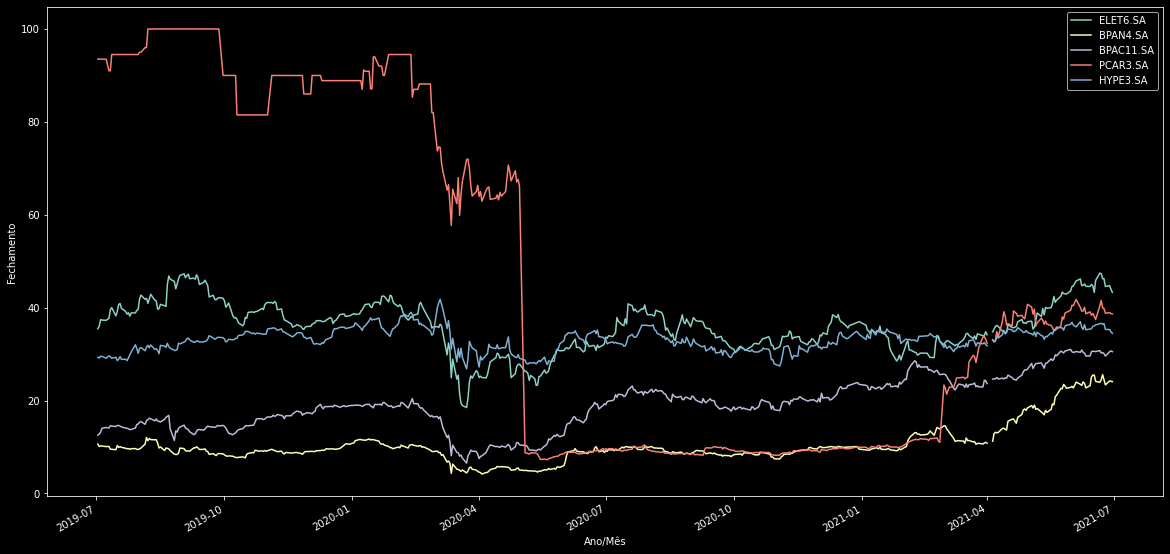

In [85]:
cluster_trei.plot(figsize=(20, 10),xlabel="Ano/Mês",ylabel="Fechamento")

# QUARTA QUESTÃO

In [86]:
cluster_trei

,ELET6.SA,BPAN4.SA,BPAC11.SA,PCAR3.SA,HYPE3.SA
2019-07-02,35.450001,10.610000,12.522500,93.500000,29.299999
2019-07-03,36.000000,10.100000,12.750000,93.500000,29.139999
2019-07-04,37.419998,10.250000,13.190000,93.500000,29.530001
2019-07-05,37.320000,10.200000,14.027500,93.500000,29.500000
2019-07-08,37.270000,10.080000,14.185000,93.500000,29.100000
...,...,...,...,...,...
2021-06-25,44.549999,23.370001,29.567499,38.799999,35.299999
2021-06-28,44.740002,24.209999,30.490000,38.930000,35.290001
2021-06-29,43.970001,24.160000,30.674999,38.709999,34.799999
2021-06-30,43.270000,24.059999,30.514999,38.660000,34.470001


## Preço, Retorno, Volatilidade e Correlação


Preços [R$]:
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2021-07-01  19.920000  20.150000  19.450001  19.450001  18.164896  2573800.0
2021-07-02  19.590000  20.799999  19.590000  20.600000  19.238911  3476600.0
2021-07-05  20.620001  21.000000  20.420000  20.809999  19.435038  1299400.0
2021-07-06  20.750000  20.750000  20.059999  20.490000  19.136181  4370600.0
2021-07-07  20.600000  21.049999  20.459999  20.920000  19.537769  2079200.0

Retornos [%]:
                     ELET6.SA  BPAN4.SA  BPAC11.SA  PCAR3.SA  HYPE3.SA
2019-07-03 00:00:00  1.551479 -4.806779   1.816730       0.0 -0.546075
2019-07-04 00:00:00  4.005636  1.413757   3.513672       0.0  1.331062
2019-07-05 00:00:00 -0.282083 -0.471255   6.687966       0.0 -0.102391
2019-07-08 00:00:00 -0.141042 -1.131007   1.257738       0.0 -1.365186

Matriz de Volatilidade [%]:
           ELET6.SA  BPAN4.SA  BPAC11.SA  PCAR3.

,ELET6.SA,BPAN4.SA,BPAC11.SA,PCAR3.SA,HYPE3.SA
2019-07-03,1.551479,-4.806779,1.816730,0.000000,-0.546075
2019-07-04,4.005636,1.413757,3.513672,0.000000,1.331062
2019-07-05,-0.282083,-0.471255,6.687966,0.000000,-0.102391
2019-07-08,-0.141042,-1.131007,1.257738,0.000000,-1.365186
2019-07-10,1.156558,0.282750,-0.838495,-2.673797,1.774746
...,...,...,...,...,...
2021-06-24,0.000000,-10.650322,-1.617084,-0.117648,0.511951
2021-06-25,-4.739070,-10.179076,-4.252356,-1.069519,-4.300349
2021-06-28,0.535973,7.917043,7.366745,0.139039,-0.034124
2021-06-29,-2.172075,-0.471246,1.477337,-0.235295,-1.672361


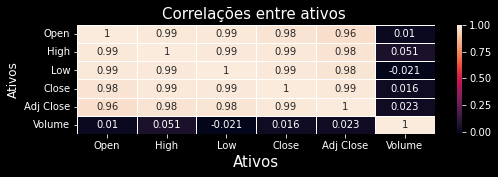

In [87]:
ret=cluster_trei.diff().dropna().copy()
ret=100*ret/cluster_trei.iloc[0]

#ret.columns=list(['r'+str(x) for x in range(1,len(po)+1)])

C=ret.cov()

sig=ret.std()

MU=ret.sum()

I=pd.DataFrame(np.identity(len(C)))

SIGMA=(C*(I.values))**0.5

P=df.corr()
print()
print("Preços [R$]:")
print(df.head())
print('')
print("Retornos [%]:")
print(ret.head(4))
print('')
print("Matriz de Volatilidade [%]:")
print(SIGMA)
print()
f, ax = plt.subplots(figsize=(8, 2))
sns.heatmap(P, annot=True, linewidths=.5, ax=ax)
plt.yticks(rotation=0) 
ax.set_ylabel("Ativos",fontsize=12)  
ax.set_xlabel("Ativos",fontsize=15)  
ax.set_title("Correlações entre ativos ",fontsize=15) 
ret

## Portfolio Para N Ativos

In [88]:
q=np.array([0.4, 0.6])
print()
print('Os pesos dos ativos r1 e r2 são %.2f e %.2f, respectivamente ' % (q[0],q[1]))
print()

r=ret[[ret.columns[0],ret.columns[1]]]

C=r.cov()
MU=r.mean()

retp=np.dot(pd.DataFrame(q).transpose(),MU)

risp=np.sqrt(np.dot(np.dot(pd.DataFrame(q).transpose(),C),np.array(q)))

print('O retorno e risco de rp em : %.2f e %.2f' % (retp,risp))
print()


Os pesos dos ativos r1 e r2 são 0.40 e 0.60, respectivamente 

O retorno e risco de rp em : 0.17 e 3.13



In [90]:
np.sum(q)

0.9999999999999999

In [91]:
N=len(ret.columns)
q = [random.randint(0,1000) for i in range(1,N+1)]
s = sum(q)
q = [ i/s for i in q ]
print(np.sum(q))

rp=np.dot(ret,q)
C=ret.cov()
MU=ret.mean()
retp=np.dot(pd.DataFrame(q).transpose(),MU)
risp=np.sqrt(np.dot(np.dot(pd.DataFrame(q).transpose(),C),pd.DataFrame(q)))


print()
print('Os pesos dos ativos são:',[round(q[i],2) for i in range(len(q))])
print()
print('O retorno e risco de rp em : %.2f e %.2f' % (retp[0], risp[0][0]))
print()

1.0

Os pesos dos ativos são: [0.07, 0.33, 0.09, 0.48, 0.04]

O retorno e risco de rp em : 0.05 e 2.49



In [92]:
def Portfolios(ret,ports):
    retp=[]
    risp=[]
    C=ret.cov()
    MU=ret.mean()
    SIG=ret.std()
    N=len(ret.columns)
    for i in tqdm(range(ports)):
        q = [random.randint(0,10000) for i in range(1,N+1)]
        s = sum(q)
        q = [ i/s for i in q ]

        retp.append(np.dot(pd.DataFrame(q).transpose(),MU)[0])
        risp.append(np.sqrt(np.dot(np.dot(pd.DataFrame(q).transpose(),C),pd.DataFrame(q)))[0][0])
    return retp, risp, SIG, MU
    
retp, risp, SIG, MU=Portfolios(ret,1000) 

  0%|          | 0/1000 [00:00<?, ?it/s]

## Risco-Retorno dos Portifolios

Text(0.5, 1.0, '1000 Portifolios')

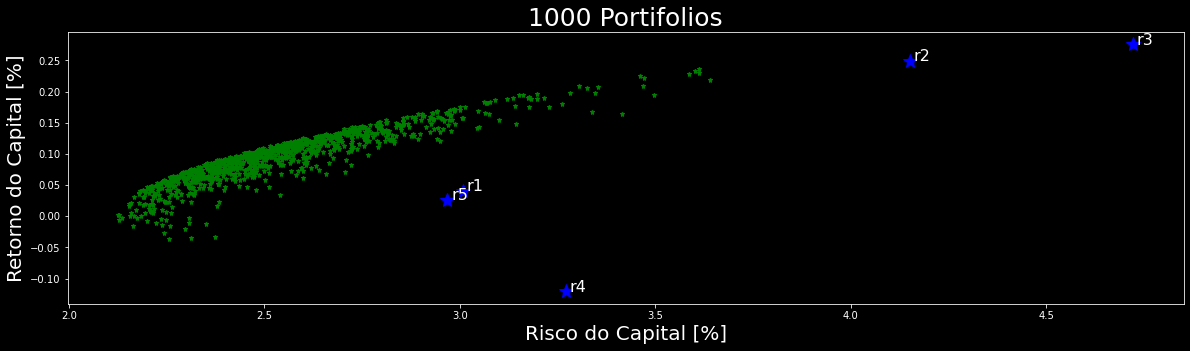

In [94]:
fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,1, 1)     
for p in range(0,len(retp)):
    ax1.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#    ax1.text(100*(sig[p]+0.001), 100*MU[p],df.columns[p], fontsize=8)

for p in range(0,len(SIG)):
    ax1.plot(SIG[p], MU[p], 'b*', markersize=15.0) 
    ax1.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

ax1.set_ylabel("Retorno do Capital [%]",fontsize=20)
ax1.set_xlabel("Risco do Capital [%]",fontsize=20)
ax1.set_title(str(len(retp))+" Portifolios",fontsize=25)  

## Calculando Fronteira de Eficiencia

### Calculando Menor Risco

In [95]:
def TPM_Menor_Risco(ret):
    C=ret.cov()
    MU=ret.mean()
    ONE=np.ones(len(ret.columns))
    d=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
    q_minrisk=np.dot(np.linalg.inv(C),pd.DataFrame(ONE))/d
    mu_minrisk=np.dot(q_minrisk.transpose(),MU.values)
    risk_minrisk=(np.dot(np.dot(pd.DataFrame(q_minrisk).transpose(),C),pd.DataFrame(q_minrisk)))**0.5
    return q_minrisk,mu_minrisk,risk_minrisk

q_minrisk,mu_minrisk,risk_minrisk = TPM_Menor_Risco(ret)

In [96]:
def TPM_Fronteira(ret,N):
    C=ret.cov()
    MU=ret.mean()
    ONE=np.ones(len(ret.columns))
    #N=1000
    a=np.dot(pd.DataFrame(MU).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(MU)))
    b=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(MU)))
    c=np.dot(pd.DataFrame(MU).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
    d=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
    target_mus=np.arange(-0.5,1.0,0.002)
    risk_at_target_mus=np.zeros(len(target_mus))
    for i in tqdm(range(0, len(target_mus))):
        target_mu=target_mus[i]
        v1=np.linalg.det([[target_mu,b[0][0]],[1,d[0][0]]])*np.dot(np.linalg.inv(C),pd.DataFrame(MU))
        v2=np.linalg.det([[a[0][0],target_mu],[c[0][0],1]])*np.dot(np.linalg.inv(C),pd.DataFrame(ONE))
        v3=np.linalg.det([[a[0][0],b[0][0]],[c[0][0],d[0][0]]])
        opt_q=(v1+v2)/v3
        risk_at_target_mus[i]=(np.dot(np.dot(pd.DataFrame(opt_q).transpose(),C),pd.DataFrame(opt_q)))**0.5
    return risk_at_target_mus, target_mus

risk_at_target_mus, target_mus = TPM_Fronteira(ret,1000)

  0%|          | 0/750 [00:00<?, ?it/s]

Text(0.5, 0, 'Risco do Capital [%]')

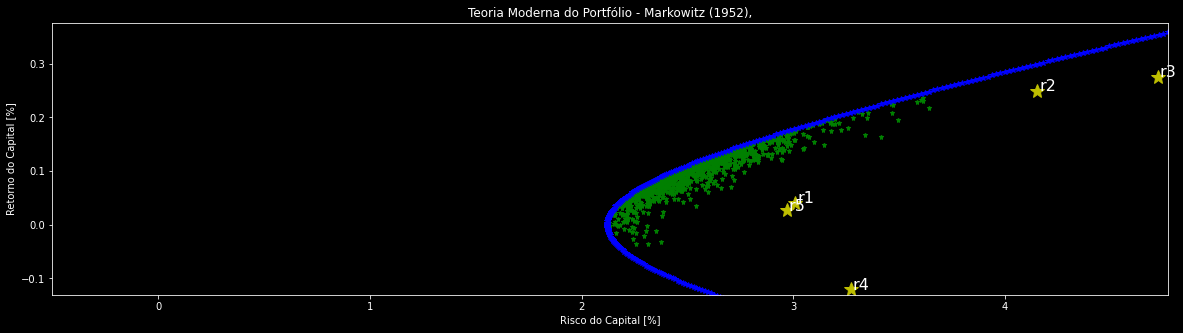

In [97]:
fig = plt.subplots(figsize=(20,5))
for p in range(0,len(retp)):
    plt.plot(risp[p], retp[p], 'g*', markersize=5.0)  
plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15.0)
plt.axis([-0.5,np.max(SIG)+0.05,np.min(MU)-0.01,np.max(MU)+.1])
plt.axvline(x= 0, color= 'k',linestyle='dashed',linewidth=4)
for p in range(0,len(SIG)):
    plt.plot(SIG[p], MU[p], 'y*', markersize=15.0) 
    plt.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

plt.plot(risk_at_target_mus,target_mus,'b*')
#plt.axis([-0.5,np.max(100*SIG),0,np.max(100*MU)])
plt.title('Teoria Moderna do Portfólio - Markowitz (1952),')
plt.ylabel('Retorno do Capital [%]')
plt.xlabel('Risco do Capital [%]')

## Escolhendo Portifolio de Maior Indice Sharpe

In [98]:
print(ret.mean())
print(ret.mean() - 0.12)


ELET6.SA     0.041083
BPAN4.SA     0.248722
BPAC11.SA    0.275650
PCAR3.SA    -0.120532
HYPE3.SA     0.026653
dtype: float64
ELET6.SA    -0.078917
BPAN4.SA     0.128722
BPAC11.SA    0.155650
PCAR3.SA    -0.240532
HYPE3.SA    -0.093347
dtype: float64


### Calculando Indice Sharpe e Pesos da Carteira

In [99]:
def peso_da_carteira_sharpe(ret,selic):
    risk_free = selic/100 
    #covariancia_retorno = ret.cov()
    #sharpe=np.dot(np.linalg.inv(covariancia_retorno),pd.DataFrame(ret.mean()-risk_free))
    sharpe = pd.DataFrame(ret.mean() - risk_free) /  pd.DataFrame(ret.std())
    pesos = sharpe / sharpe.sum()
    pesos_array = pesos
    return  pesos_array
weight = peso_da_carteira_sharpe(ret,selic).values
print(weight, "\n")
print(weight.sum())

[[ 0.87660318]
 [-2.40963414]
 [-2.46531468]
 [ 3.8141502 ]
 [ 1.18419545]] 

1.0


### Calculando O Retorno da Carteira Relativo ao Indice Sharpe

In [100]:
def retorno_realtivo_ao_peso(ret,pesos):
    retorno_medio = np.dot(pd.DataFrame(pesos).transpose(), ret.mean())
    return retorno_medio

retorno_medio = retorno_realtivo_ao_peso(ret,weight)
print(retorno_medio)

[-1.67104664]


### Calculo da Volatilidade/Risco

In [101]:
def volatilidade_dos_retornos(ret,pesos):
    covariancia_retorno = ret.cov()
    volatilidade_media = (np.dot(np.dot(pd.DataFrame(pesos).transpose(),covariancia_retorno),pd.DataFrame(pesos)))**0.5
    return volatilidade_media

volatilidade_media = volatilidade_dos_retornos(ret,weight)
print(volatilidade_media)

[[20.15965707]]


### Plotando o Grafico do Portifolio


Os pesos dos ativos no portifólio de menor risco: [0.88, -2.41, -2.47, 3.81, 1.18]



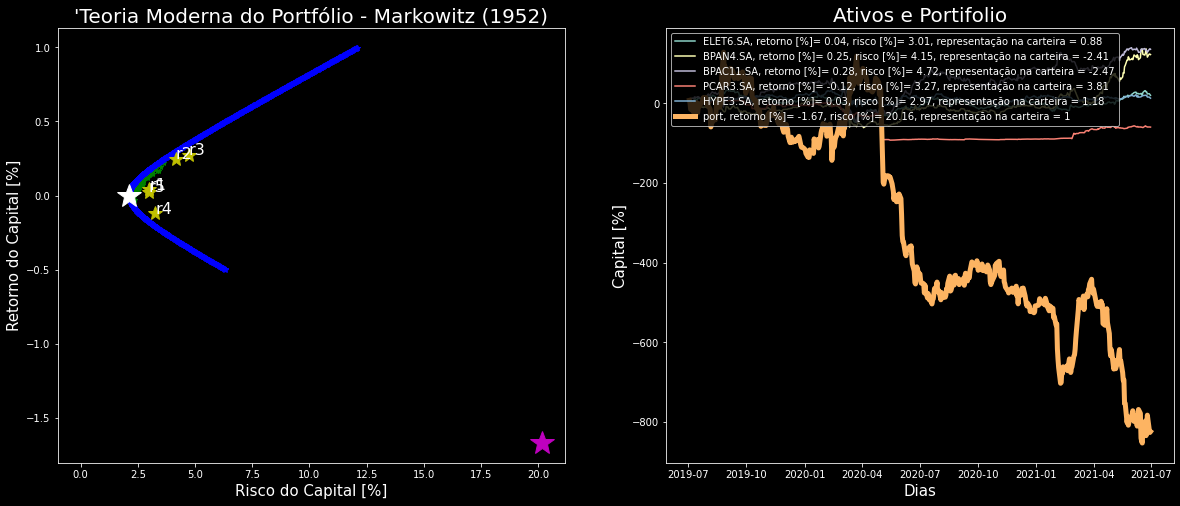

In [102]:
fig = plt.subplots(figsize=(20,8))
ax1=plt.subplot(1,2, 1) 
for p in range(0,len(retp)):
    plt.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15.0)

ax1.plot(risk_at_target_mus,target_mus,'b*')
ax1.plot(risk_minrisk,mu_minrisk,'w*',markersize=25)

ax1.plot(volatilidade_media,retorno_medio,'m*',markersize=25)


#plt.axis([-0.5,np.max(SIG)+0.05,np.min(MU)-0.01,np.max(MU)+.07])
ax1.axvline(x= 0, color= 'k',linestyle='dashed',linewidth=4)
for p in range(0,len(SIG)):
    plt.plot(SIG[p], MU[p], 'y*', markersize=15.0) 
    plt.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

ret['port']=pd.DataFrame(ret*[weight[i][0] for i in range(len(weight))]).sum(axis=1)
pesos=[weight[i][0] for i in range(len(weight))]+[1]
ax1.set_xlabel("Risco do Capital [%]",fontsize=15)
ax1.set_ylabel('Retorno do Capital [%]',fontsize=15)
ax1.set_title("'Teoria Moderna do Portfólio - Markowitz (1952)",fontsize=20)  

ax2=plt.subplot(1,2, 2) 

for i in range(len(ret.columns)):
    labeldf=ret.columns[i]+", retorno [%]= "+str(round(ret.mean()[i],2)) +", risco [%]= "+str(round(ret.std()[i],2))
    if i!=max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))     
    if i==max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),linewidth=5.0,label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))  

ax2.legend(loc='upper left')
ax2.set_xlabel("Dias",fontsize=15)
ax2.set_ylabel('Capital [%]',fontsize=15)
ax2.set_title("Ativos e Portifolio",fontsize=20) 
print()
print('Os pesos dos ativos no portifólio de menor risco:',[round(weight[i][0],2) for i in range(len(weight))])
print()

ret=ret.drop(columns=['port'])

## Linha de Mercado de Capitais


Os pesos dos ativos no portifólio de menor risco: [0.88, -2.41, -2.47, 3.81, 1.18]



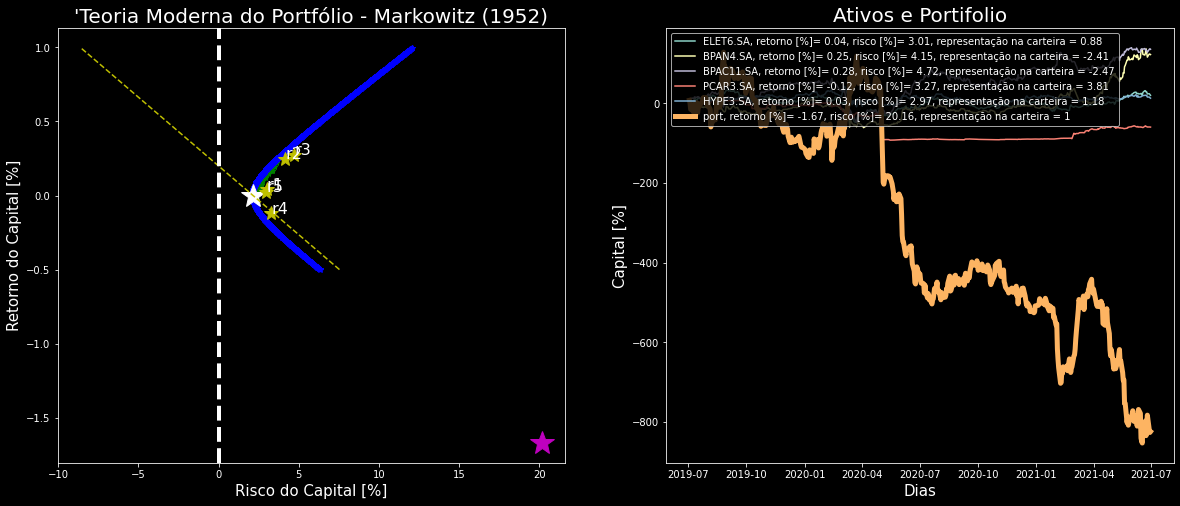

In [103]:
rf=0.2
volatilidade_media=(np.dot(np.dot(pd.DataFrame(weight).transpose(),C),pd.DataFrame(weight)))**0.5
cm_line=volatilidade_media[0][0]*(target_mus-rf)/(retorno_medio-rf)
arbitrary_line=sig[1]*(target_mus-rf)/(MU[1]-rf)


fig = plt.subplots(figsize=(20,8))
ax1=plt.subplot(1,2, 1) 
for p in range(0,len(retp)):
    plt.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15.0)


ax1.plot(risk_at_target_mus,target_mus,'b*')
ax1.plot(risk_minrisk,mu_minrisk,'w*',markersize=25)

ax1.plot(volatilidade_media,retorno_medio,'m*',markersize=25)
ax1.plot(cm_line,target_mus,'y--')

#plt.axis([-0.5,np.max(SIG)+0.05,0.01,np.max(MU)+.1])
ax1.axvline(x= 0, color= 'w',linestyle='dashed',linewidth=4)
for p in range(0,len(SIG)):
    plt.plot(SIG[p], MU[p], 'y*', markersize=15.0) 
    plt.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

if 'port' in ret.columns: 
    ret=ret.drop(columns=['port'])


ret['port']=pd.DataFrame(ret*[weight[i][0] for i in range(len(weight))]).sum(axis=1)
pesos=[weight[i][0] for i in range(len(weight))]+[1]
ax1.set_xlabel("Risco do Capital [%]",fontsize=15)
ax1.set_ylabel('Retorno do Capital [%]',fontsize=15)
ax1.set_title("'Teoria Moderna do Portfólio - Markowitz (1952)",fontsize=20)  

ax2=plt.subplot(1,2, 2) 

for i in range(len(ret.columns)):
    labeldf=ret.columns[i]+", retorno [%]= "+str(round(ret.mean()[i],2)) +", risco [%]= "+str(round(ret.std()[i],2))
    if i!=max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))     
    if i==max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),linewidth=5.0,label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))  
    
    
ax2.legend(loc='upper left')
ax2.set_xlabel("Dias",fontsize=15)
ax2.set_ylabel('Capital [%]',fontsize=15)
ax2.set_title("Ativos e Portifolio",fontsize=20) 
print()
print('Os pesos dos ativos no portifólio de menor risco:',[round(weight[i][0],2) for i in range(len(weight))])
print()

ret=ret.drop(columns=['port'])

# Questão 5

In [104]:
#ativos_amostra_teste = pd.DataFrame(outCloseTest)
ativos_amostra_teste = pd.DataFrame(outCloseTest[cluster_trei.columns])
print(df)
print(ativos_amostra_teste)

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2021-07-01  19.920000  20.150000  19.450001  19.450001  18.164896  2573800.0
2021-07-02  19.590000  20.799999  19.590000  20.600000  19.238911  3476600.0
2021-07-05  20.620001  21.000000  20.420000  20.809999  19.435038  1299400.0
2021-07-06  20.750000  20.750000  20.059999  20.490000  19.136181  4370600.0
2021-07-07  20.600000  21.049999  20.459999  20.920000  19.537769  2079200.0
...               ...        ...        ...        ...        ...        ...
2022-06-27  13.760000  13.950000  13.550000  13.710000  13.556039  1434000.0
2022-06-28  13.810000  13.970000  13.560000  13.680000  13.526376  1607700.0
2022-06-29  13.710000  13.800000  13.440000  13.480000  13.328621  1409500.0
2022-06-30  13.280000  13.400000  13.030000  13.050000  12.903450  3943200.0
2022-07-01        NaN        NaN        NaN        NaN        NaN        NaN


Preços [R$]:
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2021-07-01  19.920000  20.150000  19.450001  19.450001  18.164896  2573800.0
2021-07-02  19.590000  20.799999  19.590000  20.600000  19.238911  3476600.0
2021-07-05  20.620001  21.000000  20.420000  20.809999  19.435038  1299400.0
2021-07-06  20.750000  20.750000  20.059999  20.490000  19.136181  4370600.0
2021-07-07  20.600000  21.049999  20.459999  20.920000  19.537769  2079200.0

Retornos [%]:
                     ELET6.SA  BPAN4.SA  BPAC11.SA  PCAR3.SA  HYPE3.SA
2021-07-02 00:00:00 -0.092402  2.647564   4.553004  2.563431  1.085996
2021-07-05 00:00:00 -1.385998 -1.953120  -0.166166 -1.647913 -0.176101
2021-07-06 00:00:00 -1.293604 -1.953128  -2.293122 -2.877327 -1.467567
2021-07-07 00:00:00  1.339797  0.434029   0.830841 -0.392356  1.350159

Matriz de Volatilidade [%]:
           ELET6.SA  BPAN4.SA  BPAC11.SA  PCAR3.

,ELET6.SA,BPAN4.SA,BPAC11.SA,PCAR3.SA,HYPE3.SA
2021-07-02,-0.092402,2.647564,4.553004,2.563431,1.085996
2021-07-05,-1.385998,-1.953120,-0.166166,-1.647913,-0.176101
2021-07-06,-1.293604,-1.953128,-2.293122,-2.877327,-1.467567
2021-07-07,1.339797,0.434029,0.830841,-0.392356,1.350159
2021-07-08,-0.877795,-3.081601,-1.794613,-0.680100,-1.144700
...,...,...,...,...,...
2022-06-24,1.547697,-0.086805,-0.432041,-0.209260,-2.406809
2022-06-27,2.541008,0.217013,2.691929,-0.496993,2.465513
2022-06-28,0.692999,-0.434027,-2.060488,1.229399,-1.408863
2022-06-29,0.623702,-0.347222,-1.030241,-1.098614,-2.670971


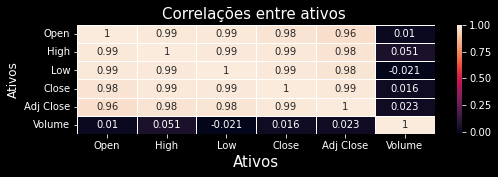

In [105]:
ret=ativos_amostra_teste.diff().dropna().copy()
ret=100*ret/ativos_amostra_teste.iloc[0]

#ret.columns=list(['r'+str(x) for x in range(1,len(po)+1)])

C=ret.cov()

sig=ret.std()

MU=ret.sum()

I=pd.DataFrame(np.identity(len(C)))

SIGMA=(C*(I.values))**0.5

P=df.corr()
print()
print("Preços [R$]:")
print(df.head())
print('')
print("Retornos [%]:")
print(ret.head(4))
print('')
print("Matriz de Volatilidade [%]:")
print(SIGMA)
print()
f, ax = plt.subplots(figsize=(8, 2))
sns.heatmap(P, annot=True, linewidths=.5, ax=ax)
plt.yticks(rotation=0) 
ax.set_ylabel("Ativos",fontsize=12)  
ax.set_xlabel("Ativos",fontsize=15)  
ax.set_title("Correlações entre ativos ",fontsize=15) 
ret

In [69]:
q=np.array([0.4, 0.6])
print()
print('Os pesos dos ativos r1 e r2 são %.2f e %.2f, respectivamente ' % (q[0],q[1]))
print()

r=ret[[ret.columns[0],ret.columns[1]]]

C=r.cov()
MU=r.mean()

retp=np.dot(pd.DataFrame(q).transpose(),MU)

risp=np.sqrt(np.dot(np.dot(pd.DataFrame(q).transpose(),C),np.array(q)))

print('O retorno e risco de rp em : %.2f e %.2f' % (retp,risp))
print()


Os pesos dos ativos r1 e r2 são 0.40 e 0.60, respectivamente 

O retorno e risco de rp em : -0.16 e 1.96



In [106]:
np.sum(q)

1.0

In [107]:
N=len(ret.columns)
q = [random.randint(0,1000) for i in range(1,N+1)]
s = sum(q)
q = [ i/s for i in q ]
print(np.sum(q))

rp=np.dot(ret,q)
C=ret.cov()
MU=ret.mean()
retp=np.dot(pd.DataFrame(q).transpose(),MU)
risp=np.sqrt(np.dot(np.dot(pd.DataFrame(q).transpose(),C),pd.DataFrame(q)))


print()
print('Os pesos dos ativos são:',[round(q[i],2) for i in range(len(q))])
print()
print('O retorno e risco de rp em : %.2f e %.2f' % (retp[0], risp[0][0]))
print()

1.0

Os pesos dos ativos são: [0.37, 0.31, 0.07, 0.16, 0.1]

O retorno e risco de rp em : -0.12 e 1.53



In [72]:
def Portfolios(ret,ports):
    retp=[]
    risp=[]
    C=ret.cov()
    MU=ret.mean()
    SIG=ret.std()
    N=len(ret.columns)
    for i in tqdm(range(ports)):
        q = [random.randint(0,10000) for i in range(1,N+1)]
        s = sum(q)
        q = [ i/s for i in q ]

        retp.append(np.dot(pd.DataFrame(q).transpose(),MU)[0])
        risp.append(np.sqrt(np.dot(np.dot(pd.DataFrame(q).transpose(),C),pd.DataFrame(q)))[0][0])
    return retp, risp, SIG, MU
    
retp, risp, SIG, MU=Portfolios(ret,1000) 

  0%|          | 0/1000 [00:00<?, ?it/s]

Text(0.5, 1.0, '1 Portifolios')

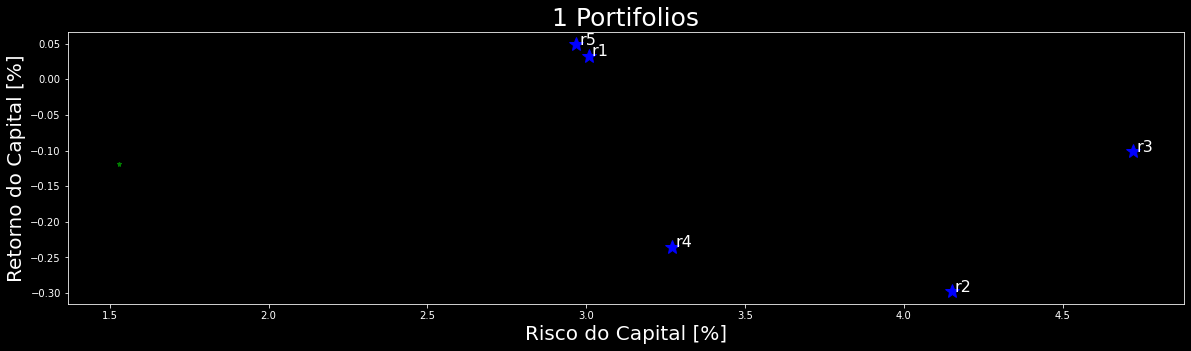

In [108]:
fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,1, 1)     
for p in range(0,len(retp)):
    ax1.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#    ax1.text(100*(sig[p]+0.001), 100*MU[p],df.columns[p], fontsize=8)

for p in range(0,len(SIG)):
    ax1.plot(SIG[p], MU[p], 'b*', markersize=15.0) 
    ax1.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

ax1.set_ylabel("Retorno do Capital [%]",fontsize=20)
ax1.set_xlabel("Risco do Capital [%]",fontsize=20)
ax1.set_title(str(len(retp))+" Portifolios",fontsize=25)  

In [109]:
def TPM_Fronteira(ret,N):
    C=ret.cov()
    MU=ret.mean()
    ONE=np.ones(len(ret.columns))
    #N=1000
    a=np.dot(pd.DataFrame(MU).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(MU)))
    b=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(MU)))
    c=np.dot(pd.DataFrame(MU).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
    d=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
    target_mus=np.arange(-0.5,1.0,0.002)
    risk_at_target_mus=np.zeros(len(target_mus))
    for i in tqdm(range(0, len(target_mus))):
        target_mu=target_mus[i]
        v1=np.linalg.det([[target_mu,b[0][0]],[1,d[0][0]]])*np.dot(np.linalg.inv(C),pd.DataFrame(MU))
        v2=np.linalg.det([[a[0][0],target_mu],[c[0][0],1]])*np.dot(np.linalg.inv(C),pd.DataFrame(ONE))
        v3=np.linalg.det([[a[0][0],b[0][0]],[c[0][0],d[0][0]]])
        opt_q=(v1+v2)/v3
        risk_at_target_mus[i]=(np.dot(np.dot(pd.DataFrame(opt_q).transpose(),C),pd.DataFrame(opt_q)))**0.5
    return risk_at_target_mus, target_mus

risk_at_target_mus, target_mus = TPM_Fronteira(ret,1000)

  0%|          | 0/750 [00:00<?, ?it/s]

Text(0.5, 0, 'Risco do Capital [%]')

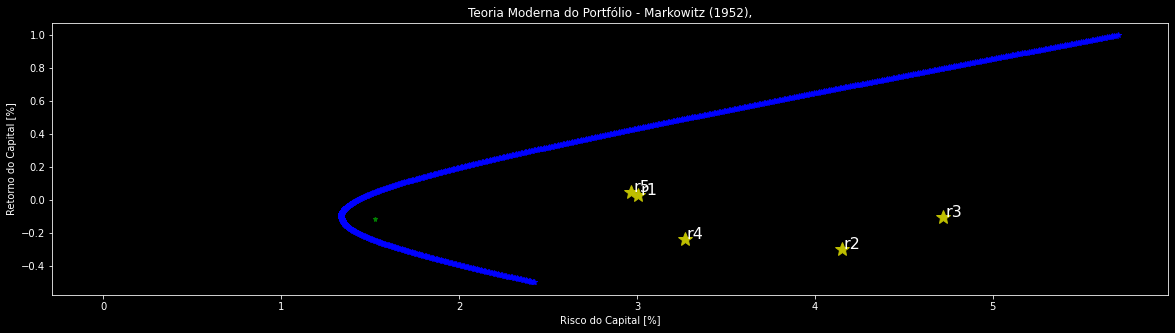

In [110]:
fig = plt.subplots(figsize=(20,5))
for p in range(0,len(retp)):
    plt.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15.0)
#plt.axis([-0.5,np.max(SIG)+0.05,np.min(MU)-0.01,np.max(MU)+.1])
plt.axvline(x= 0, color= 'k',linestyle='dashed',linewidth=4)
for p in range(0,len(SIG)):
    plt.plot(SIG[p], MU[p], 'y*', markersize=15.0) 
    plt.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

plt.plot(risk_at_target_mus,target_mus,'b*')
#plt.axis([-0.5,np.max(100*SIG),0,np.max(100*MU)])
plt.title('Teoria Moderna do Portfólio - Markowitz (1952),')
plt.ylabel('Retorno do Capital [%]')
plt.xlabel('Risco do Capital [%]')

In [111]:
print(ret.mean())
print(ret.mean() - 0.12)

ELET6.SA     0.032546
BPAN4.SA    -0.297669
BPAC11.SA   -0.101181
PCAR3.SA    -0.235735
HYPE3.SA     0.048959
dtype: float64
ELET6.SA    -0.087454
BPAN4.SA    -0.417669
BPAC11.SA   -0.221181
PCAR3.SA    -0.355735
HYPE3.SA    -0.071041
dtype: float64


In [112]:
def peso_da_carteira_sharpe(ret,selic):
    risk_free = selic/100 
    #covariancia_retorno = ret.cov()
    #sharpe=np.dot(np.linalg.inv(covariancia_retorno),pd.DataFrame(ret.mean()-risk_free))
    sharpe = pd.DataFrame(ret.mean() - risk_free) /  pd.DataFrame(ret.std())
    pesos = sharpe / sharpe.sum()
    pesos_array = pesos
    return  pesos_array
weight = peso_da_carteira_sharpe(ret,selic).values
print(weight, "\n")
print(weight.sum())

[[0.0573032 ]
 [0.33806913]
 [0.17846288]
 [0.38614994]
 [0.04001485]] 

1.0


In [113]:
def retorno_realtivo_ao_peso(ret,pesos):
    retorno_medio = np.dot(pd.DataFrame(pesos).transpose(), ret.mean())
    return retorno_medio

retorno_medio = retorno_realtivo_ao_peso(ret,weight)
print(retorno_medio)

[-0.20589481]


In [79]:
def volatilidade_dos_retornos(ret,pesos):
    covariancia_retorno = ret.cov()
    volatilidade_media = (np.dot(np.dot(pd.DataFrame(pesos).transpose(),covariancia_retorno),pd.DataFrame(pesos)))**0.5
    return volatilidade_media

volatilidade_media = volatilidade_dos_retornos(ret,weight)
print(volatilidade_media)

[[1.46451303]]



Os pesos dos ativos no portifólio de menor risco: [0.06, 0.34, 0.18, 0.39, 0.04]



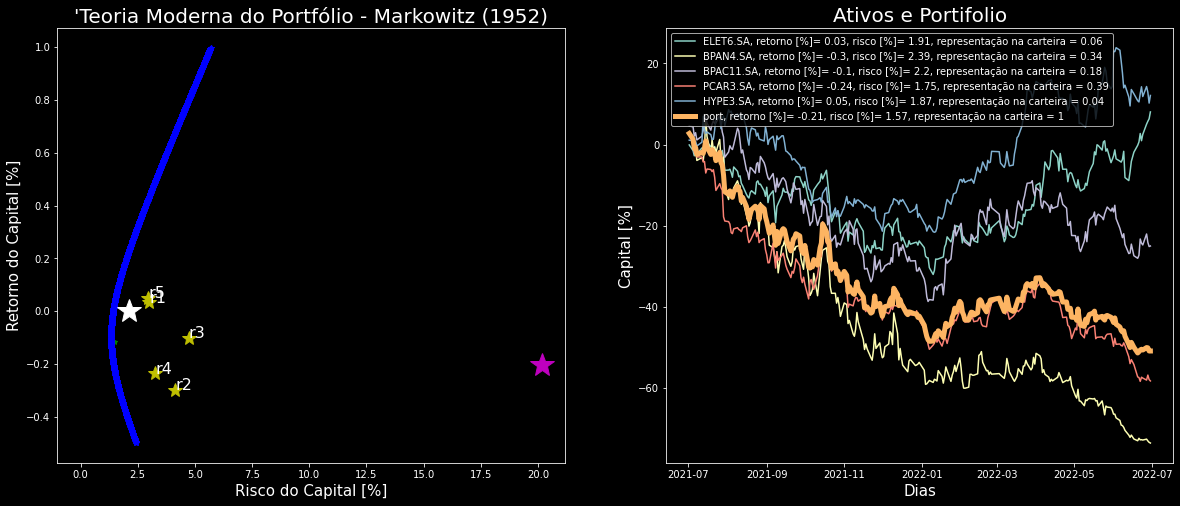

In [114]:
fig = plt.subplots(figsize=(20,8))
ax1=plt.subplot(1,2, 1) 
for p in range(0,len(retp)):
    plt.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15.0)

ax1.plot(risk_at_target_mus,target_mus,'b*')
ax1.plot(risk_minrisk,mu_minrisk,'w*',markersize=25)

ax1.plot(volatilidade_media,retorno_medio,'m*',markersize=25)


#plt.axis([-0.5,np.max(SIG)+0.05,np.min(MU)-0.01,np.max(MU)+.07])
ax1.axvline(x= 0, color= 'k',linestyle='dashed',linewidth=4)
for p in range(0,len(SIG)):
    plt.plot(SIG[p], MU[p], 'y*', markersize=15.0) 
    plt.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

ret['port']=pd.DataFrame(ret*[weight[i][0] for i in range(len(weight))]).sum(axis=1)
pesos=[weight[i][0] for i in range(len(weight))]+[1]
ax1.set_xlabel("Risco do Capital [%]",fontsize=15)
ax1.set_ylabel('Retorno do Capital [%]',fontsize=15)
ax1.set_title("'Teoria Moderna do Portfólio - Markowitz (1952)",fontsize=20)  

ax2=plt.subplot(1,2, 2) 

for i in range(len(ret.columns)):
    labeldf=ret.columns[i]+", retorno [%]= "+str(round(ret.mean()[i],2)) +", risco [%]= "+str(round(ret.std()[i],2))
    if i!=max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))     
    if i==max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),linewidth=5.0,label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))  

ax2.legend(loc='upper left')
ax2.set_xlabel("Dias",fontsize=15)
ax2.set_ylabel('Capital [%]',fontsize=15)
ax2.set_title("Ativos e Portifolio",fontsize=20) 
print()
print('Os pesos dos ativos no portifólio de menor risco:',[round(weight[i][0],2) for i in range(len(weight))])
print()

ret=ret.drop(columns=['port'])